# Figures for HGT Paper

To start, 
1. Scroll down to "BACK END", 
2. (optional) edit the Data Setup cells (if needed to add new data)
3. and run every cell from there to the end.

Then, proceed from here to generate paper

## Section 1 - CE/Static - Violin Plot of HGT fragment uptake in different conditions

Extract Stats: hgt.dat.gz field: attempts ( 10 ) -  mean
Extracting: ,+,,,, Done


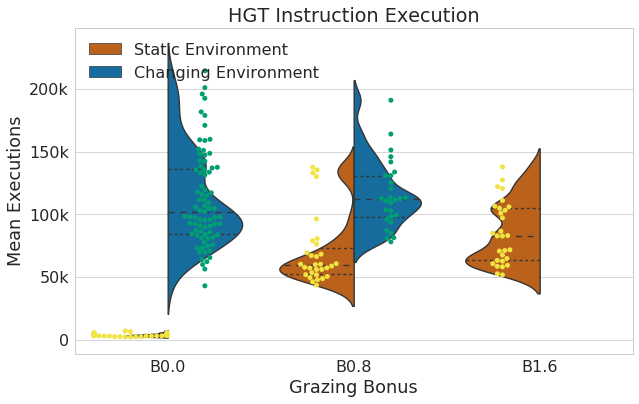

In [188]:
## Section 1 - Violin Plot

subset = grab_set(series="CA-1", ts=treatments)
subset = thin_set(factor="B", ts=subset)
#subset = thin_set(factor="B1.6", ts=subset)

#print subset

extract_stats(subset, "hgt.dat.gz", "attempts", "10", verbose=False, dont_overwrite=True)

#basic_violin(subset, "uptake", hue="Env", width=10)


############ Violin

df = import_data(subset, "attempts")

huebit = df["Env"].dropna().unique().tolist()  
pal_v = {}
pal_s = {}

if len(huebit) > 0:
    v_colors = ['r','b']
    s_colors = ['y', 'g']

    for v, i in zip(huebit , range(len(huebit))):
        pal_v[v] = v_colors[i]
        pal_s[v] = s_colors[i]     
    
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)
plt.rcParams['figure.figsize'] = (10, 6)
    


ax = sns.violinplot(x="Bonus", y="Value", hue="Env", data=df, 
                    split=True, 
                    scale="count", 
#                    scale_hue=True, 
                    bw=.3, 
                    inner="quart", 
                    palette=pal_v)
sns.swarmplot(x="Bonus", y="Value", hue="Env", data=df, 
             split=True,
             palette=pal_s)        

plt.title("HGT Instruction Execution")
plt.xlabel("Grazing Bonus")
plt.ylabel("Mean Executions")
#plt.ylim([0,400000])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Static Environment","Changing Environment"], loc='upper left')

import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    if s == "0":
        return 0
    return s[:-3] + "k"
y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

plt.show()

# Task Performance

In [189]:
%pwd 
post_reward_data = []
for t in treatments:  

    print t
    
    post_reward = []
    post_reward_persistent = []
        
    for i in range(1,51):
              
        bit = str(i).zfill(2)
        globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/tasks.dat*'
        dfiles = sorted(glob.glob(globstring))
        #print globstring
        
        for item in dfiles:
            sys.stdout.write('.')  
            #sys
            #print item
            df = pd.read_csv(item, header=None, comment="#", 
                              delimiter=' ', usecols=range(78),
                              skipinitialspace=True) #, names=fields)
            
            
            post_reward.append( len(df.tail(2000).mean().nonzero()[0]) - 3 )
            # 3.6 is 1% of the population at any given time
            post_reward_persistent.append( len(df.tail(2000).mean().where(lambda x : x > 3.6).dropna().nonzero()[0]) - 3 )
    print " done"        
    
    intermediate = pd.DataFrame()
    intermediate['tasks performed'] = post_reward
    intermediate['label'] = [t] * len(post_reward)
    intermediate['persistence'] = ['incl. transient'] * len(post_reward)
    intermediate['Treatment'] = [ treatments[t]['longlabel'] ] * len(post_reward)
    
    post_reward_data.append(intermediate)

    intermediate = pd.DataFrame()
    intermediate['tasks performed'] = post_reward_persistent
    intermediate['label'] = [t] * len(post_reward_persistent)
    intermediate['persistence'] = ['persistent'] * len(post_reward_persistent)
    intermediate['Treatment'] = [ treatments[t]['longlabel'] ] * len(post_reward_persistent)
    
    post_reward_data.append(intermediate)

post_reward = pd.concat(post_reward_data)

#print post_reward

            

CA-1_Z1_HGT_B0.0
.................................................. done
CA-1_Z2_noHGT_B0.0
................................................. done
CA-1_Z3_noHGT_B0.0_CE
.............................................. done
CA-1_Z4_noHGT_B0.0_CEq
................................................ done
CA-1_Z5_noHGT_B0.0_CE_benign
................................................. done
CA-1_Z6_noHGT_B0.0_CEq_benign
................................................ done
CA-1_A1_HGT_B0.0_CE
............................................... done
CA-1_A5_HGT_B0.0_CEq
................................................. done
CA-1_A2_HGT_B0.8
............................................. done
CA-1_A3_HGT_B1.6
............................. done
CA-1_A4_HGT_B0.8_CE
........................................... done
CA-1_A6_HGT_B0.8_CEq
.......................................... done
CA-1_B1_HGT_B0.0_CE_benign
.............................................. done
CA-1_B5_HGT_B0.0_CEq_benign
....................

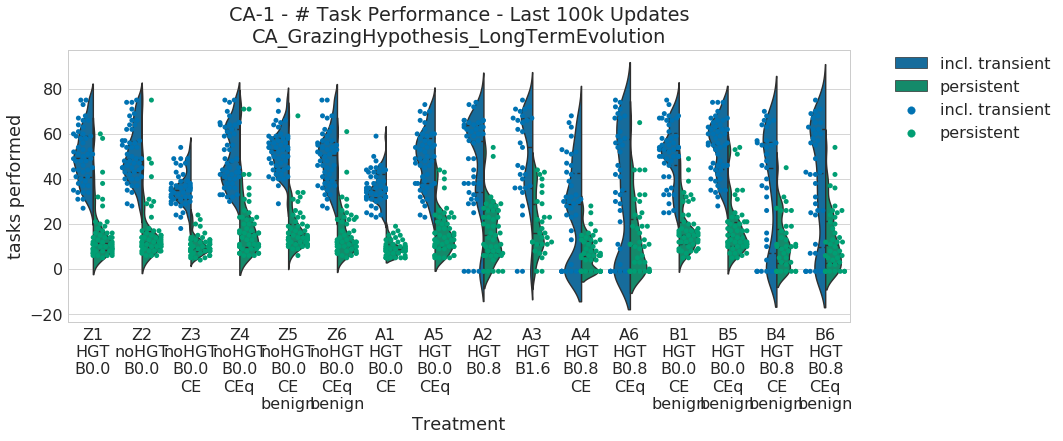

In [190]:
#print treatments

sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)
plt.rcParams['figure.figsize'] = (14, 5)
plt.title(data_number + " - # Task Performance - Last 100k Updates" + "\n"+data_name)
sns.violinplot(x="Treatment", y="tasks performed", hue='persistence', 
               data=post_reward, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Treatment", y="tasks performed", hue='persistence', 
              data=post_reward, 
              split=True,
                 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#print "HELLO"

# HGT Use - Timeseries

In [260]:
hgt_uptakes = []
tct = 0
for t in treatments:  
    tct += 1
    print t
    
    dfs = []
        
    for i in range(1,51):
                
        bit = str(i).zfill(2) ## runs from 01 to 50
        globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/hgt.dat*'
        dfiles = sorted(glob.glob(globstring))

        for item in dfiles:
            sys.stdout.write('.')

            df = pd.read_csv(item, header=None, comment="#", 
                              delimiter=' ', usecols=[0,6],
                              skipinitialspace=True, 
                              names=['update', 'uptakes'] 
                            )
            
            
            df['id'] = [ treatments[t]['id'] ] * len(df)
            df['treatment'] = [t] * len(df)
            df['label'] = [ treatments[t]['longlabel'] ] * len(df)
            df['replicate'] = [i] * len(df)
                
                
             
            dfs.append( df )
            
    intermediate = pd.concat(dfs)
    
    
    hgt_uptakes.append(intermediate)
        
    print "  done"
    
hgt_uptakes = pd.concat(hgt_uptakes)

print hgt_uptakes.describe()
print hgt_uptakes.head()  

#slice_200k = data.loc[data['update'] >= 200000]

CA-1_Z1_HGT_B0.0
..................................................  done
CA-1_Z2_noHGT_B0.0
.................................................  done
CA-1_Z3_noHGT_B0.0_CE
..............................................  done
CA-1_Z4_noHGT_B0.0_CEq
................................................  done
CA-1_Z5_noHGT_B0.0_CE_benign
.................................................  done
CA-1_Z6_noHGT_B0.0_CEq_benign
................................................  done
CA-1_Z7_HGT_B0.0_nologic77
..................................................  done
CA-1_Z8_noHGT_B0.0_nologic77
.................................................  done
CA-1_A1_HGT_B0.0_CE
...............................................  done
CA-1_A5_HGT_B0.0_CEq
.................................................  done
CA-1_A2_HGT_B0.8
.............................................  done
CA-1_A3_HGT_B1.6
.............................  done
CA-1_A4_HGT_B0.8_CE
...........................................  done
CA-1_A6_HGT_B0.8

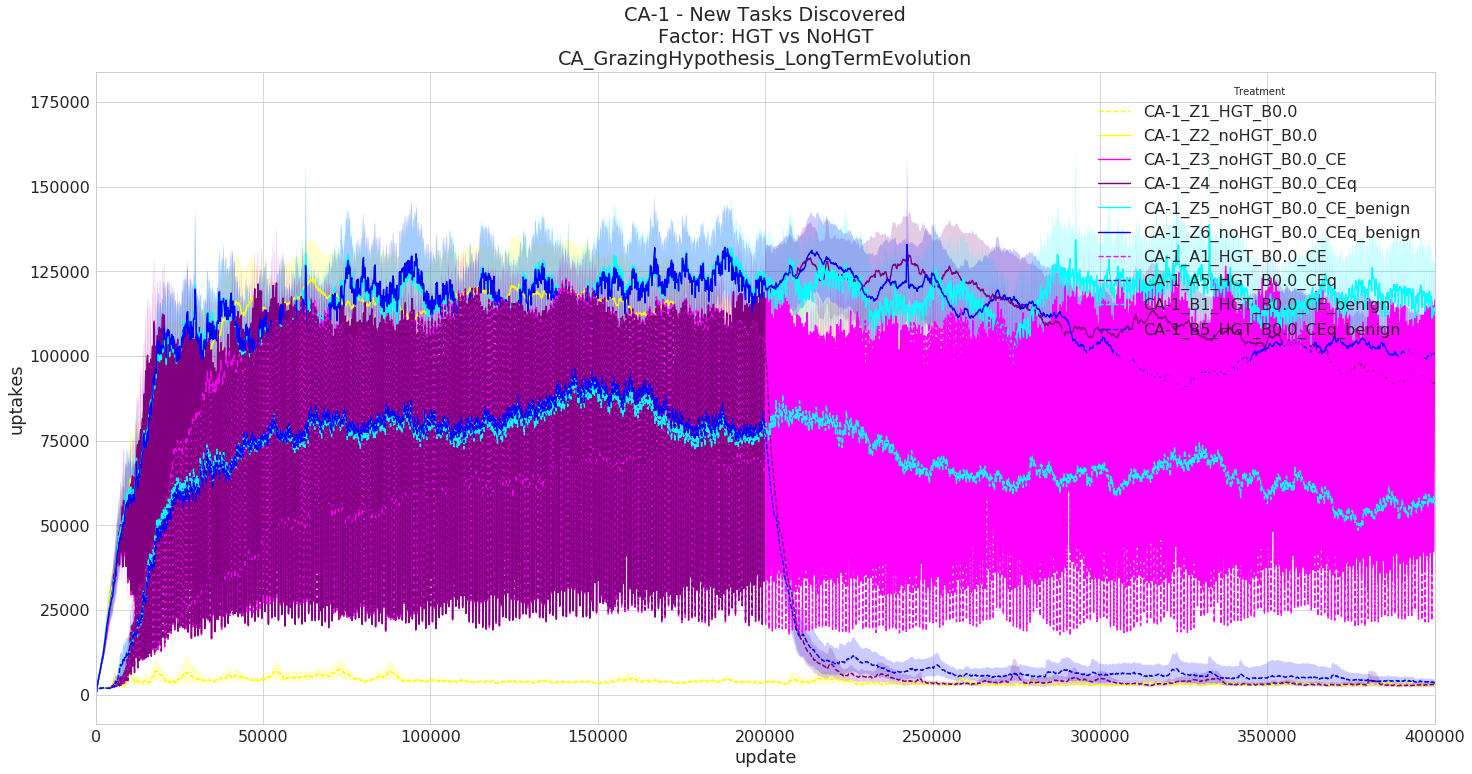

In [261]:
# Factor HGT vs noHGT
# Environment Type Sweep

#print data

part = hgt_uptakes [ (hgt_uptakes['id'] == "Z1") | (hgt_uptakes['id'] == 'Z2') |
            (hgt_uptakes['id'] == "Z3") | (hgt_uptakes['id'] == 'Z4') |
            (hgt_uptakes['id'] == "Z5") | (hgt_uptakes['id'] == 'Z6') |
            (hgt_uptakes['id'] == "A1") | (hgt_uptakes['id'] == 'A5') |
            (hgt_uptakes['id'] == "B1") | (hgt_uptakes['id'] == 'B5')]

#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - HGT Fragment Uptake" + "\nFactor: HGT vs NoHGT" + "\n"+data_name)
ax = sns.tsplot(time="update", value="uptakes",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

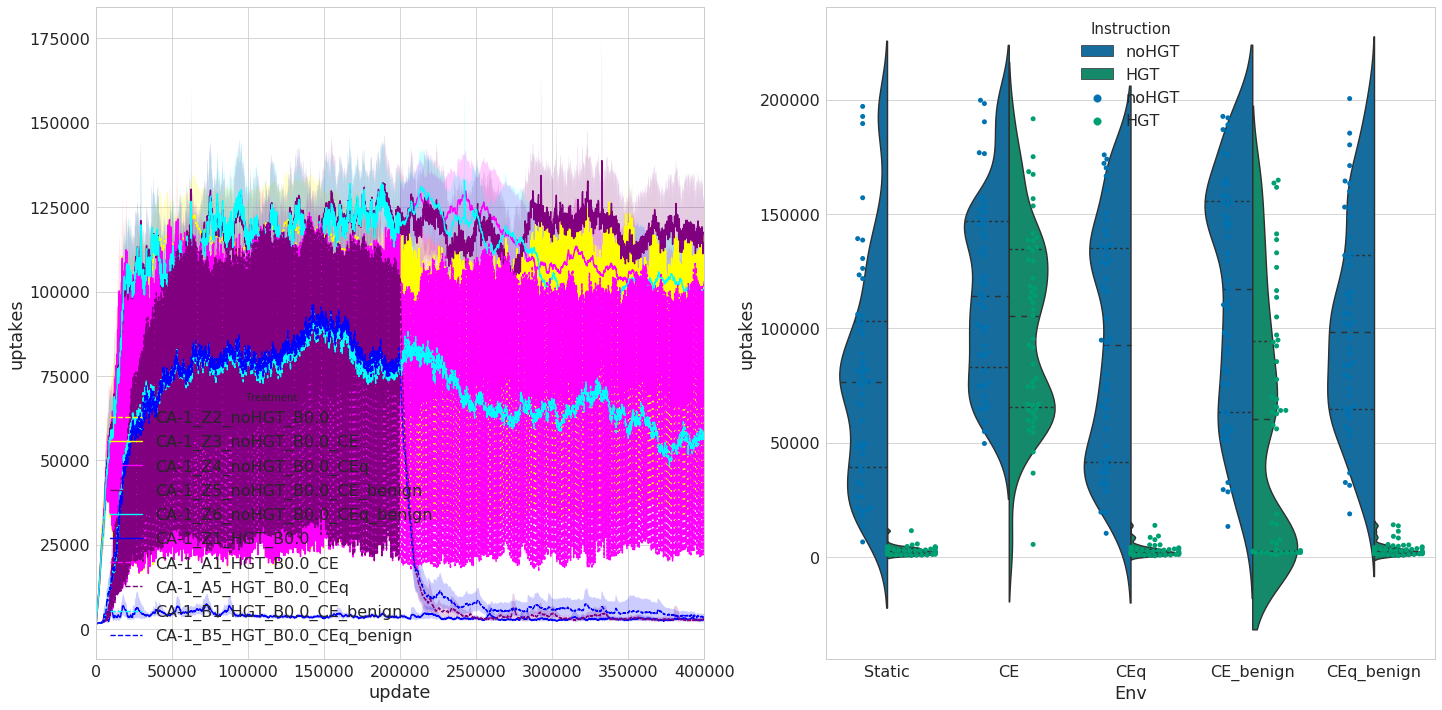

In [284]:
# Factor HGT vs noHGT
# Environment Type Sweep

#print data

data = hgt_uptakes

partA = data [(data['id'] == 'Z2') |
            (data['id'] == "Z3") | (data['id'] == 'Z4') |
            (data['id'] == "Z5") | (data['id'] == 'Z6') ]
partA['Instruction'] = ['noHGT'] * len(partA)

partB = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
partB['Instruction'] = ['HGT'] * len(partB)

part = pd.concat([partA, partB])
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - HGT Fragment Uptake" + "\nFactor: HGT vs NoHGT" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="uptakes",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')



plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

sns.violinplot(x="Env", y="uptakes", hue='Instruction', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Env", y="uptakes", hue='Instruction', 
              data=piece, 
              split=True,
                 )

# ax.legend(title='Treatment')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

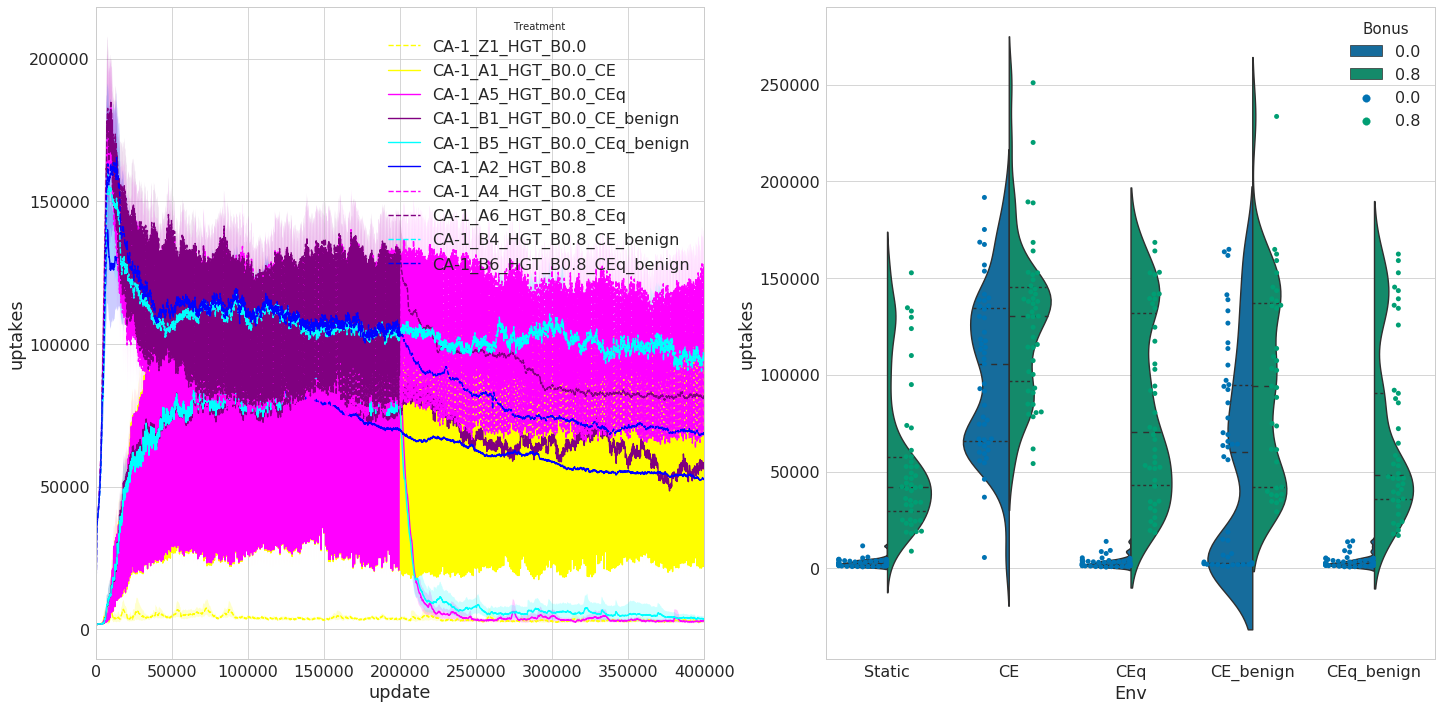

In [286]:
# Factor Bonus 0.0 vs 0.8
# Environment Type Sweep

#print data

data = hgt_uptakes

partA = data [(data['id'] == "A2") |
            (data['id'] == "A4") | (data['id'] == 'A6') |
            (data['id'] == "B4") | (data['id'] == 'B6')]
partA['Bonus'] = ['0.8'] * len(partA)

partB = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
partB['Bonus'] = ['0.0'] * len(partB)

part = pd.concat([partB, partA])
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - Task Count" + "\nFactor: Bonus 0.0 vs 0.8" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="uptakes",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')


plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

sns.violinplot(x="Env", y="uptakes", hue='Bonus', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart",)                
sns.swarmplot(x="Env", y="uptakes", hue='Bonus',  
              data=piece, 
              split=True,)



# Copied vs Executed Genome Size Ratio - Timeseries 

In [288]:
genomesize = []
tct = 0
for t in treatments:  
    tct += 1
    print t
    
    dfs = []
        
    for i in range(1,51):
                
        bit = str(i).zfill(2) ## runs from 01 to 50
        globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/average.dat*'
        dfiles = sorted(glob.glob(globstring))

        for item in dfiles:
            sys.stdout.write('.')

            df = pd.read_csv(item, header=None, comment="#", 
                              delimiter=' ', usecols=[0,6,7],
                              skipinitialspace=True, 
                              names=['update', 'copied_size', 'executed_size'] 
                            )
            
            
            df['id'] = [ treatments[t]['id'] ] * len(df)
            df['treatment'] = [t] * len(df)
            df['label'] = [ treatments[t]['longlabel'] ] * len(df)
            df['replicate'] = [i] * len(df)
                
            df['c_e_ratio'] = df.apply(lambda row: row['executed_size']/row['copied_size'], axis=1)    
                
            dfs.append( df )
            
    intermediate = pd.concat(dfs)
    
    
    genomesize.append(intermediate)
        
    print "  done"
    
genomesize = pd.concat(genomesize)

print genomesize.describe()
print genomesize.head()  

#slice_200k = data.loc[data['update'] >= 200000]

CA-1_Z1_HGT_B0.0
..................................................  done
CA-1_Z2_noHGT_B0.0
.................................................  done
CA-1_Z3_noHGT_B0.0_CE
..............................................  done
CA-1_Z4_noHGT_B0.0_CEq
................................................  done
CA-1_Z5_noHGT_B0.0_CE_benign
.................................................  done
CA-1_Z6_noHGT_B0.0_CEq_benign
................................................  done
CA-1_Z7_HGT_B0.0_nologic77
..................................................  done
CA-1_Z8_noHGT_B0.0_nologic77
.................................................  done
CA-1_A1_HGT_B0.0_CE
...............................................  done
CA-1_A5_HGT_B0.0_CEq
.................................................  done
CA-1_A2_HGT_B0.8
.............................................  done
CA-1_A3_HGT_B1.6
.............................  done
CA-1_A4_HGT_B0.8_CE
...........................................  done
CA-1_A6_HGT_B0.8

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

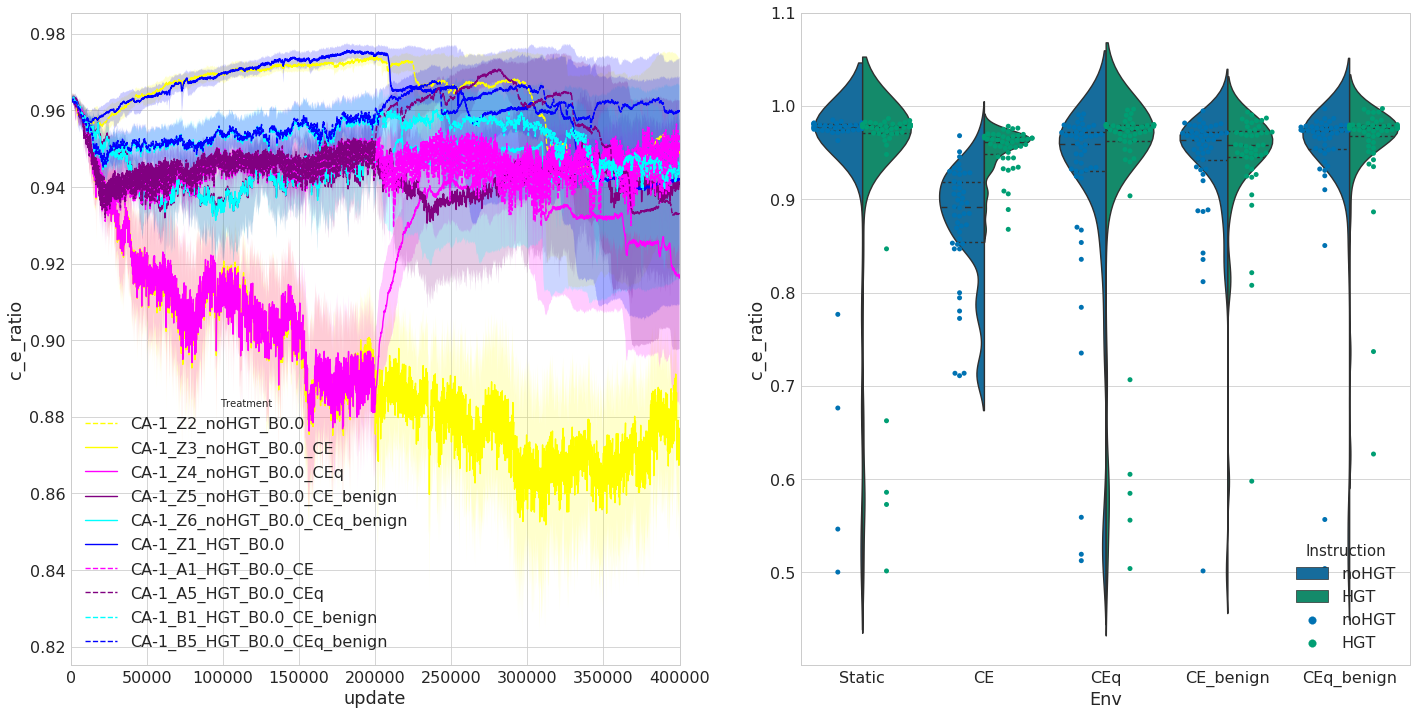

In [289]:
# Factor HGT vs noHGT
# Environment Type Sweep

#print data

data = genomesize

partA = data [(data['id'] == 'Z2') |
            (data['id'] == "Z3") | (data['id'] == 'Z4') |
            (data['id'] == "Z5") | (data['id'] == 'Z6') ]
partA['Instruction'] = ['noHGT'] * len(partA)

partB = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
partB['Instruction'] = ['HGT'] * len(partB)

part = pd.concat([partA, partB])
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - Ratio of Executed Inst vs Copied Inst" + "\nFactor: HGT vs NoHGT" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="c_e_ratio",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')



plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

sns.violinplot(x="Env", y="c_e_ratio", hue='Instruction', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Env", y="c_e_ratio", hue='Instruction', 
              data=piece, 
              split=True,
                 )

# ax.legend(title='Treatment')


In [ ]:
# Factor Bonus 0.0 vs 0.8
# Environment Type Sweep

#print data

data = genomesize

partA = data [(data['id'] == "A2") |
            (data['id'] == "A4") | (data['id'] == 'A6') |
            (data['id'] == "B4") | (data['id'] == 'B6')]
partA['Bonus'] = ['0.8'] * len(partA)

partB = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
partB['Bonus'] = ['0.0'] * len(partB)

part = pd.concat([partB, partA])
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - Ratio of Executed Inst vs Copied Inst" + "\nFactor: Bonus 0.0 vs 0.8" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="c_e_ratio",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')


plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

sns.violinplot(x="Env", y="c_e_ratio", hue='Bonus', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart",)                
sns.swarmplot(x="Env", y="c_e_ratio", hue='Bonus',  
              data=piece, 
              split=True,)



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

# Task Performance - Data Gathering

In [262]:
task_perf = []
tct = 0
for t in treatments:  
    tct += 1
    print t
    
    dfs = []
        
    for i in range(1,51):
                
        bit = str(i).zfill(2) ## runs from 01 to 50
        globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/tasks.dat*'
        dfiles = sorted(glob.glob(globstring))

        for item in dfiles:
            sys.stdout.write('.')

            df = pd.read_csv(item, header=None, comment="#", 
                              delimiter=' ', usecols=[0]+range(10, 78),
                              skipinitialspace=True) #, names=fields)
            
            
            df['id'] = [ treatments[t]['id'] ] * len(df)
            df['treatment'] = [t] * len(df)
            df['label'] = [ treatments[t]['longlabel'] ] * len(df)
            df['replicate'] = [i] * len(df)
                
                
            ## TODO, collect the booled bits.
            ## figure out how to do this efficiently, while fighting with the fucking series.
            col_list = list(df)
            col_list.remove(0)
            
            bleh = df[col_list].where(lambda x : x > 3.6, axis=1)
            bleh = bleh.fillna(value=0, axis=1).astype(bool)
            
            running = [False] * len(bleh.iloc[0].tolist())
            running_post_reward = [False] * len(bleh.iloc[0].tolist())
            running_ct = []
            running_post_reward_ct = []

            #bleh.describe()
            
            #print len(bleh)
            
            for i in range(len(bleh)):
                #sys.stdout.write("-")
                running = [k | j for k,j in zip(running, bleh.iloc[i].tolist())]
                running_ct.append(sum( [int(l) for l in running] ))
                
                if (i * 100) >= 200000:
                    #sys.stdout.write(":")
                    #print "post"
                    running_post_reward = [k | j for k,j in zip(running_post_reward, bleh.iloc[i].tolist())]
                    running_post_reward_ct.append(sum( [int(l) for l in running_post_reward] ))
                    #print running_post_reward_ct[-1], running_ct[-1]
                else:
                    running_post_reward_ct.append(0)
                    
                
            

            df['new_tasks'] = running_ct
            df['new_tasks_post_reward'] = running_post_reward_ct
                
            dfs.append( df )
            
    intermediate = pd.concat(dfs)
    
    col_list = list(intermediate)
    col_list.remove(0)
    
    dta = pd.DataFrame()

    dta['update'] = intermediate[0]

    
    dta['id'] = intermediate['id']
    dta['label'] = intermediate['label']
    dta['treatment'] = intermediate['treatment']
        
    dta['replicate'] = intermediate['replicate']
    
    dta['new_tasks'] = intermediate['new_tasks']
    dta['new_tasks_post_reward'] = intermediate['new_tasks_post_reward']
    
    dta['task_sum'] = intermediate[col_list].sum(axis=1)
        
    bleh = intermediate[col_list].where(lambda x : x > 3.6, axis=1)
    bleh = bleh.fillna(value=0, axis=1).astype(bool).sum(axis=1)   
    dta['task_ct'] = bleh
        
    #print dta.describe()
    #print dta.head()
    
    task_perf.append(dta)
        
    print "  done"
    
task_perf = pd.concat(task_perf)

#print data.describe()
#print data.head()  

slice_200k = task_perf.loc[task_perf['update'] >= 200000]

CA-1_Z1_HGT_B0.0
..................................................  done
CA-1_Z2_noHGT_B0.0
.................................................  done
CA-1_Z3_noHGT_B0.0_CE
..............................................  done
CA-1_Z4_noHGT_B0.0_CEq
................................................  done
CA-1_Z5_noHGT_B0.0_CE_benign
.................................................  done
CA-1_Z6_noHGT_B0.0_CEq_benign
................................................  done
CA-1_Z7_HGT_B0.0_nologic77
..................................................  done
CA-1_Z8_noHGT_B0.0_nologic77
.................................................  done
CA-1_A1_HGT_B0.0_CE
...............................................  done
CA-1_A5_HGT_B0.0_CEq
.................................................  done
CA-1_A2_HGT_B0.8
.............................................  done
CA-1_A3_HGT_B1.6
.............................  done
CA-1_A4_HGT_B0.8_CE
...........................................  done
CA-1_A6_HGT_B0.8

## Task Performance

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

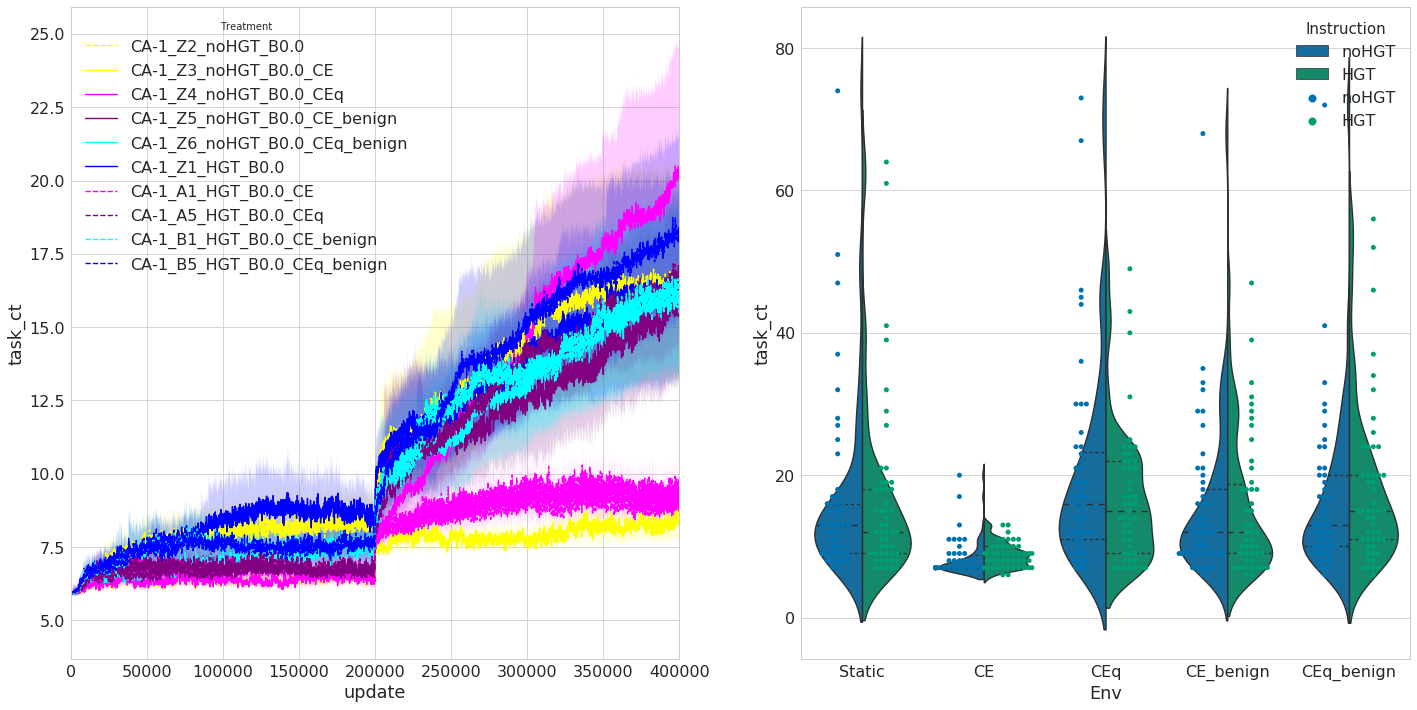

In [282]:
# Factor HGT vs noHGT
# Environment Type Sweep

#print data

data = task_perf

partA = data [(data['id'] == 'Z2') |
            (data['id'] == "Z3") | (data['id'] == 'Z4') |
            (data['id'] == "Z5") | (data['id'] == 'Z6') ]
partA['Instruction'] = ['noHGT'] * len(partA)

partB = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
partB['Instruction'] = ['HGT'] * len(partB)

part = pd.concat([partA, partB])
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - Distinct Tasks Performed" + "\nFactor: HGT vs NoHGT" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="task_ct",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')



plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

sns.violinplot(x="Env", y="task_ct", hue='Instruction', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Env", y="task_ct", hue='Instruction', 
              data=piece, 
              split=True,
                 )

# ax.legend(title='Treatment')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

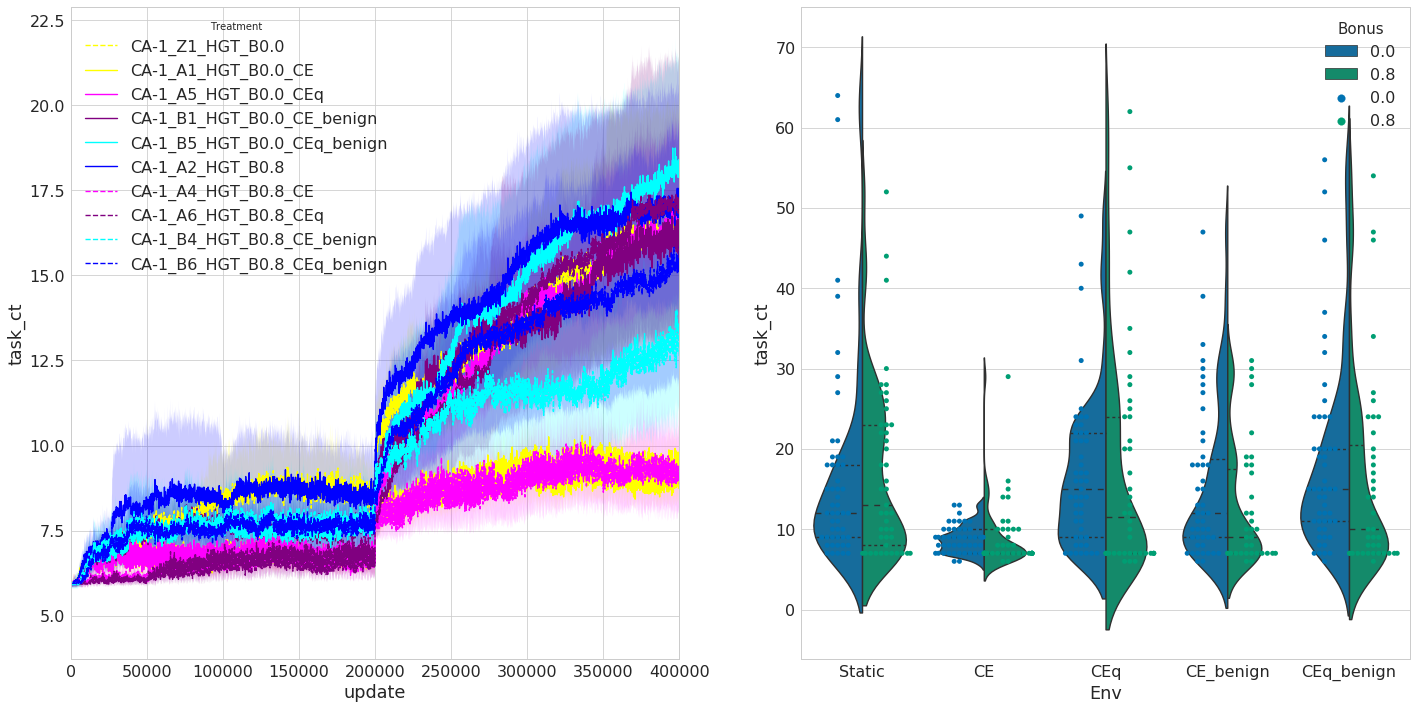

In [283]:
# Factor Bonus 0.0 vs 0.8
# Environment Type Sweep

#print data

data = task_perf

partA = data [(data['id'] == "A2") |
            (data['id'] == "A4") | (data['id'] == 'A6') |
            (data['id'] == "B4") | (data['id'] == 'B6')]
partA['Bonus'] = ['0.8'] * len(partA)

partB = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
partB['Bonus'] = ['0.0'] * len(partB)

part = pd.concat([partB, partA])
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - Task Count" + "\nFactor: Bonus 0.0 vs 0.8" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="task_ct",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')


plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

sns.violinplot(x="Env", y="task_ct", hue='Bonus', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart",)                
sns.swarmplot(x="Env", y="task_ct", hue='Bonus',  
              data=piece, 
              split=True,)



## Task Discovery

### Overall

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

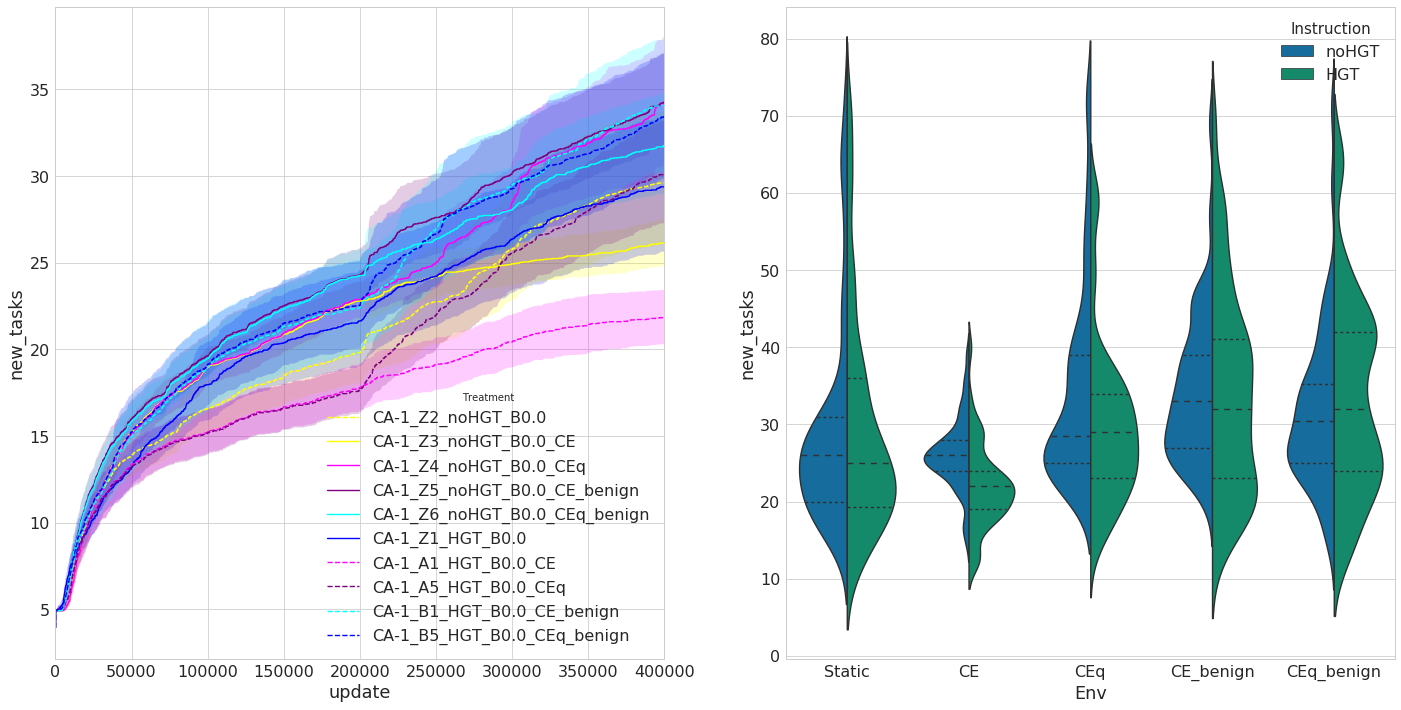

In [277]:
# Factor HGT vs noHGT
# Environment Type Sweep

#print data

data = task_perf

# part = data [ (data['id'] == "Z1") | (data['id'] == 'Z2') |
#             (data['id'] == "Z3") | (data['id'] == 'Z4') |
#             (data['id'] == "Z5") | (data['id'] == 'Z6') |
#             (data['id'] == "A1") | (data['id'] == 'A5') |
#             (data['id'] == "B1") | (data['id'] == 'B5')]

partA = data [(data['id'] == 'Z2') |
            (data['id'] == "Z3") | (data['id'] == 'Z4') |
            (data['id'] == "Z5") | (data['id'] == 'Z6') ]
partA['Instruction'] = ['noHGT'] * len(partA)

partB = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
partB['Instruction'] = ['HGT'] * len(partB)

part = pd.concat([partA, partB])
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - New Tasks Discovered" + "\nFactor: HGT vs NoHGT" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="new_tasks",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')



plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

sns.violinplot(x="Env", y="new_tasks", hue='Instruction', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Env", y="new_tasks", hue='Instruction', 
              data=piece, 
              split=True,
                 )

# ax.legend(title='Treatment')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

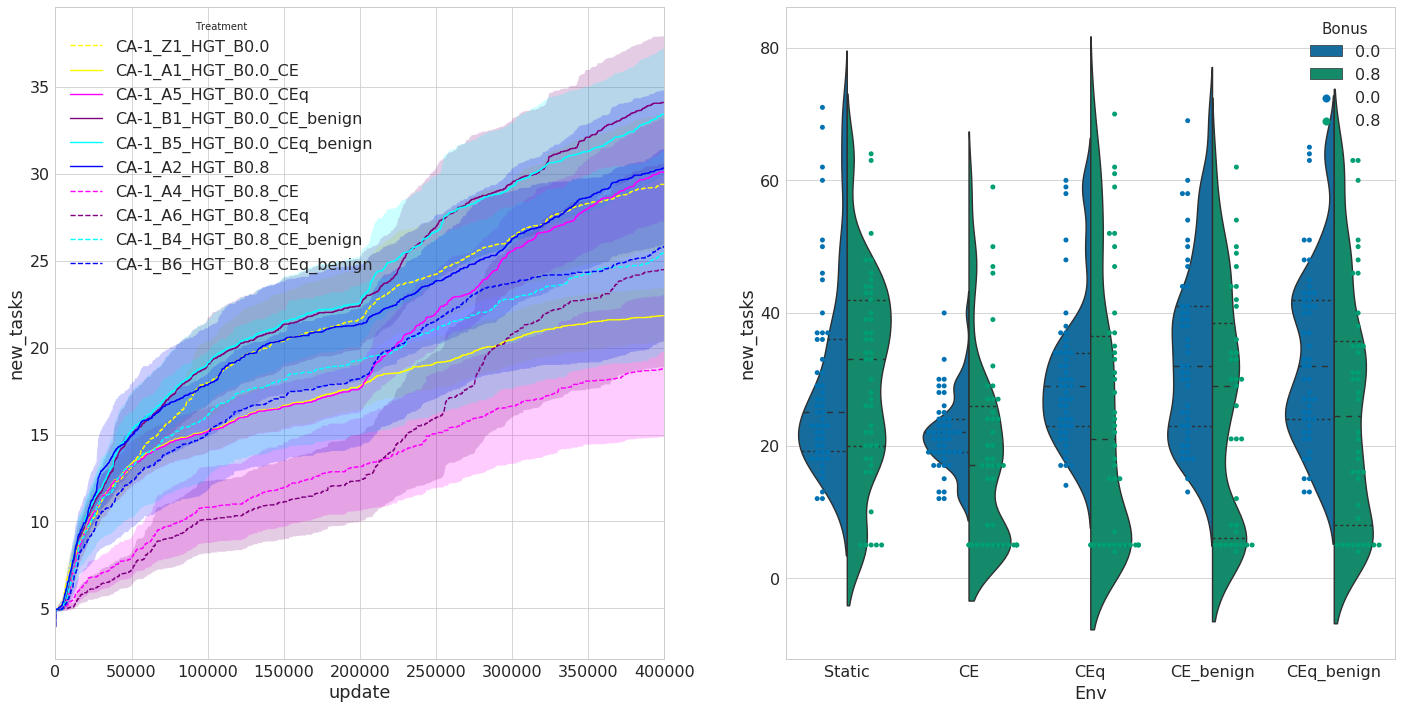

In [279]:
# Factor HGT vs noHGT
# Environment Type Sweep

#print data

data = task_perf

# part = data [ (data['id'] == "Z1") | (data['id'] == 'Z2') |
#             (data['id'] == "Z3") | (data['id'] == 'Z4') |
#             (data['id'] == "Z5") | (data['id'] == 'Z6') |
#             (data['id'] == "A1") | (data['id'] == 'A5') |
#             (data['id'] == "B1") | (data['id'] == 'B5')]

partA = data [(data['id'] == "A2") |
            (data['id'] == "A4") | (data['id'] == 'A6') |
            (data['id'] == "B4") | (data['id'] == 'B6')]
partA['Bonus'] = ['0.8'] * len(partA)

partB = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
partB['Bonus'] = ['0.0'] * len(partB)

part = pd.concat([partB, partA])
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - New Tasks Discovered" + "\nFactor: Bonus 0.0 vs 0.8" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="new_tasks",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')



plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

sns.violinplot(x="Env", y="new_tasks", hue='Bonus', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Env", y="new_tasks", hue='Bonus',  
              data=piece, 
              split=True,
                 )

# ax = sns.tsplot(time="update", value="new_tasks",
#                 unit="replicate", 
#                 condition="treatment",
#                 data=part,
#                 color=colors,
#                 ci=[95])
# for line, style in zip(ax.lines, linestyles):
#     line.set_linestyle(style)
# ax.legend(title='Treatment')


### Post Logic 77 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

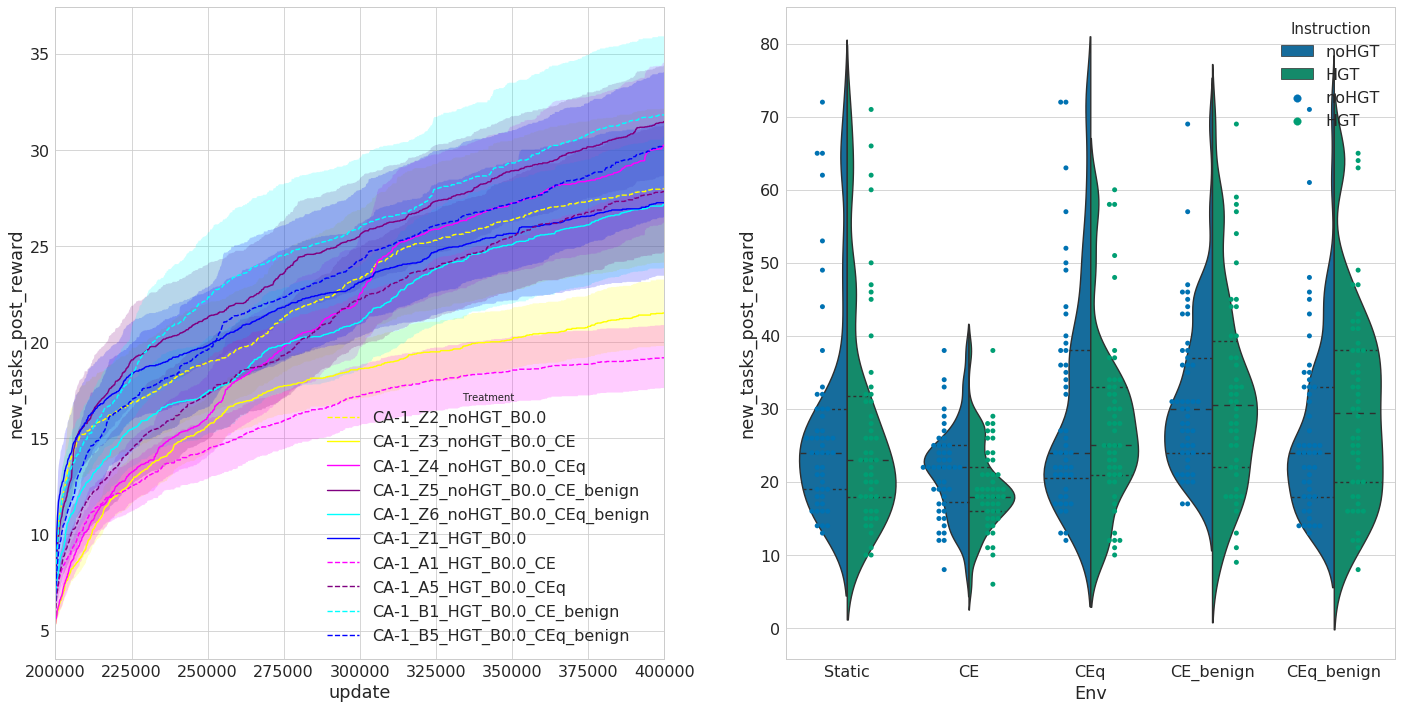

In [281]:
# Factor HGT vs noHGT
# Environment Type Sweep

#print data

data = task_perf

# part = data [ (data['id'] == "Z1") | (data['id'] == 'Z2') |
#             (data['id'] == "Z3") | (data['id'] == 'Z4') |
#             (data['id'] == "Z5") | (data['id'] == 'Z6') |
#             (data['id'] == "A1") | (data['id'] == 'A5') |
#             (data['id'] == "B1") | (data['id'] == 'B5')]

partA = data [(data['id'] == 'Z2') |
            (data['id'] == "Z3") | (data['id'] == 'Z4') |
            (data['id'] == "Z5") | (data['id'] == 'Z6') ]
partA['Instruction'] = ['noHGT'] * len(partA)

partB = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
partB['Instruction'] = ['HGT'] * len(partB)

part = pd.concat([partA, partB])
part = part.loc[part['update'] >= 200000]
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - New Tasks Discovered" + "\nFactor: HGT vs NoHGT" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')



plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

sns.violinplot(x="Env", y="new_tasks_post_reward", hue='Instruction', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Env", y="new_tasks_post_reward", hue='Instruction', 
              data=piece, 
              split=True,
                 )

# ax.legend(title='Treatment')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

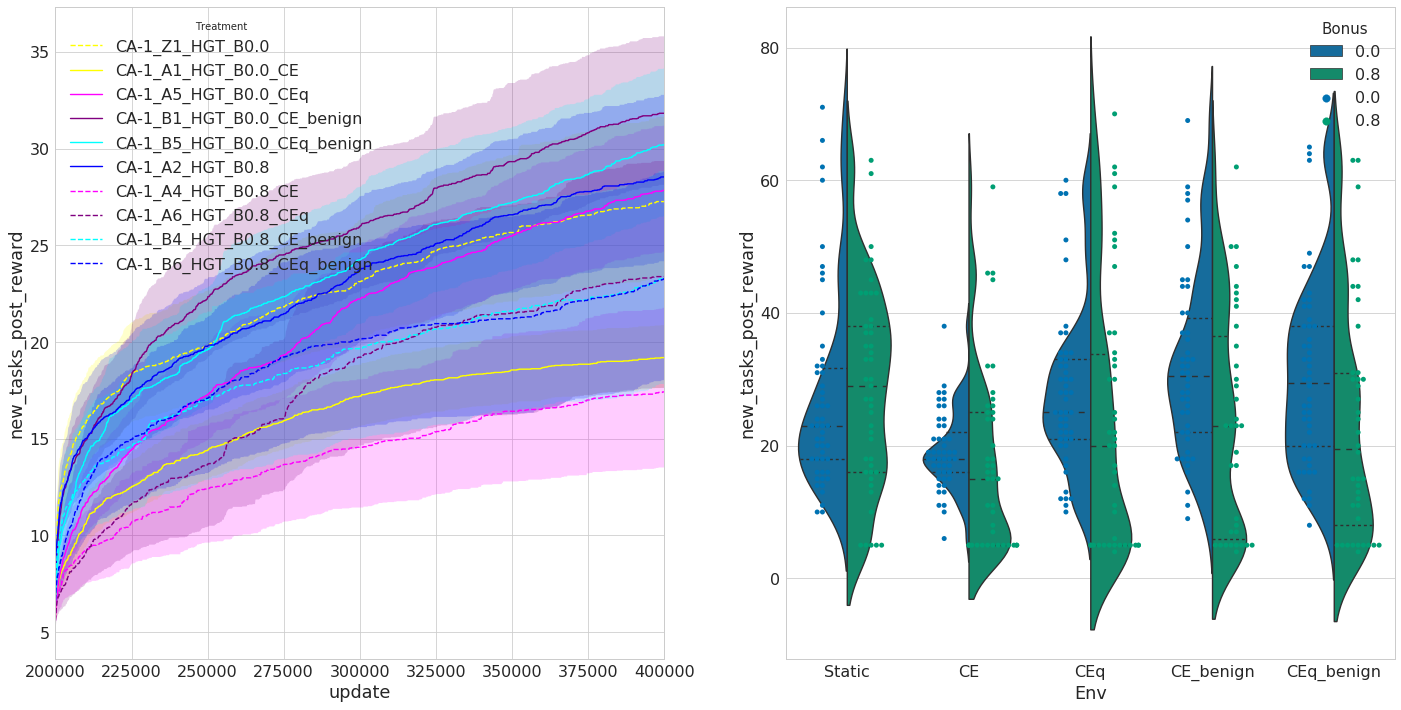

In [280]:
b

# Sanity Checks and Data Overview

In [69]:
analysis_sets = {
        "all": treatments,
        "CA-1": grab_set(series="CA-1", ts=treatments),
}

## Fitness

In [74]:
extract_stats(treatments, "average.dat.gz", "fitness", 4, verbose=False)
basic_violin(analysis_sets['CA-1'], "fitness", width=6, height=3, font_scale=1, hue="Env")

Extract Stats: average.dat.gz field: fitness ( 4 ) -  mean
Extracting: ooooooo Done


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S6') dtype('S6') dtype('S6')

## HGT Uptakes

Extract Stats: hgt.dat.gz field: uptakes ( 7 ) -  mean
Extracting: ,,,,,,,,,,,,,,,,,,,,,,, Done


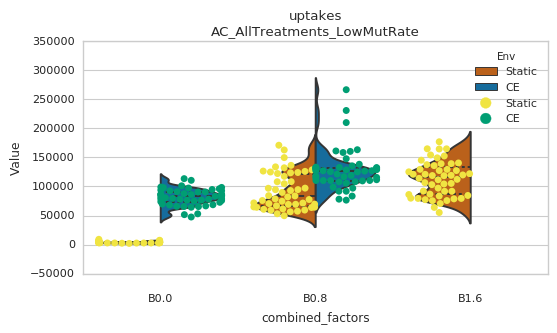

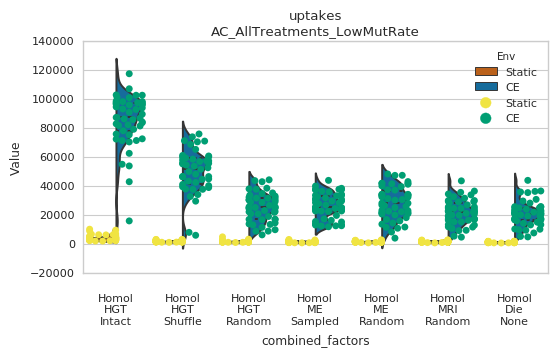

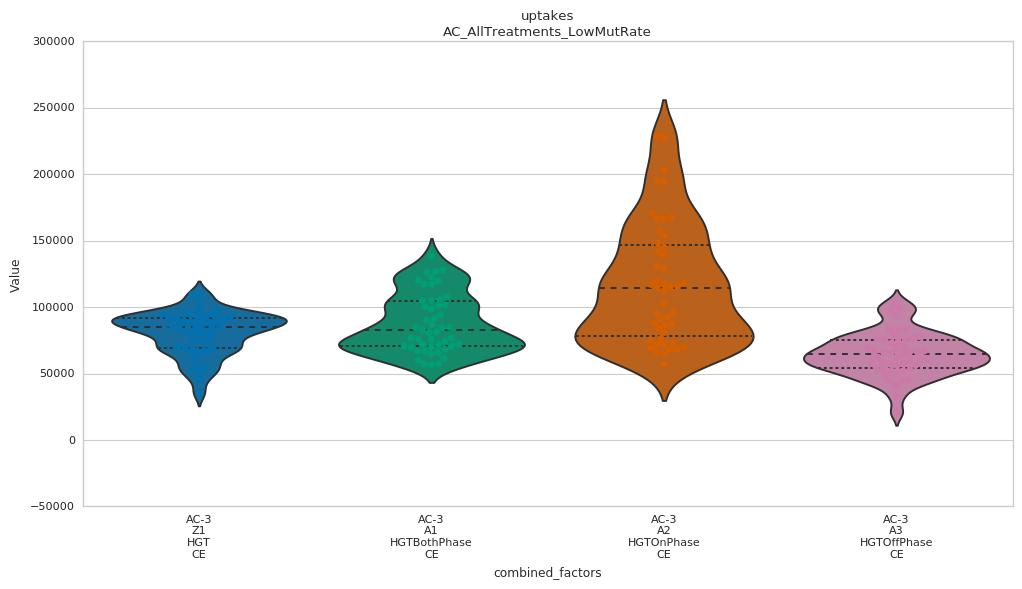

In [42]:
extract_stats(treatments, "hgt.dat.gz", "uptakes", 7, verbose=False, dont_overwrite=True)
basic_violin(analysis_sets['AC-1'], "uptakes", width=6, height=3, font_scale=1, hue="Env")
basic_violin(analysis_sets['AC-2'], "uptakes", width=6, height=3, font_scale=1, hue="Env")
basic_violin(analysis_sets['AC-3'], "uptakes", width=12, height=6, font_scale=1)

Extract Stats: hgt.dat.gz field: recomb ( 8 ) -  mean
Extracting: +++++++++++++++++++++++ Done


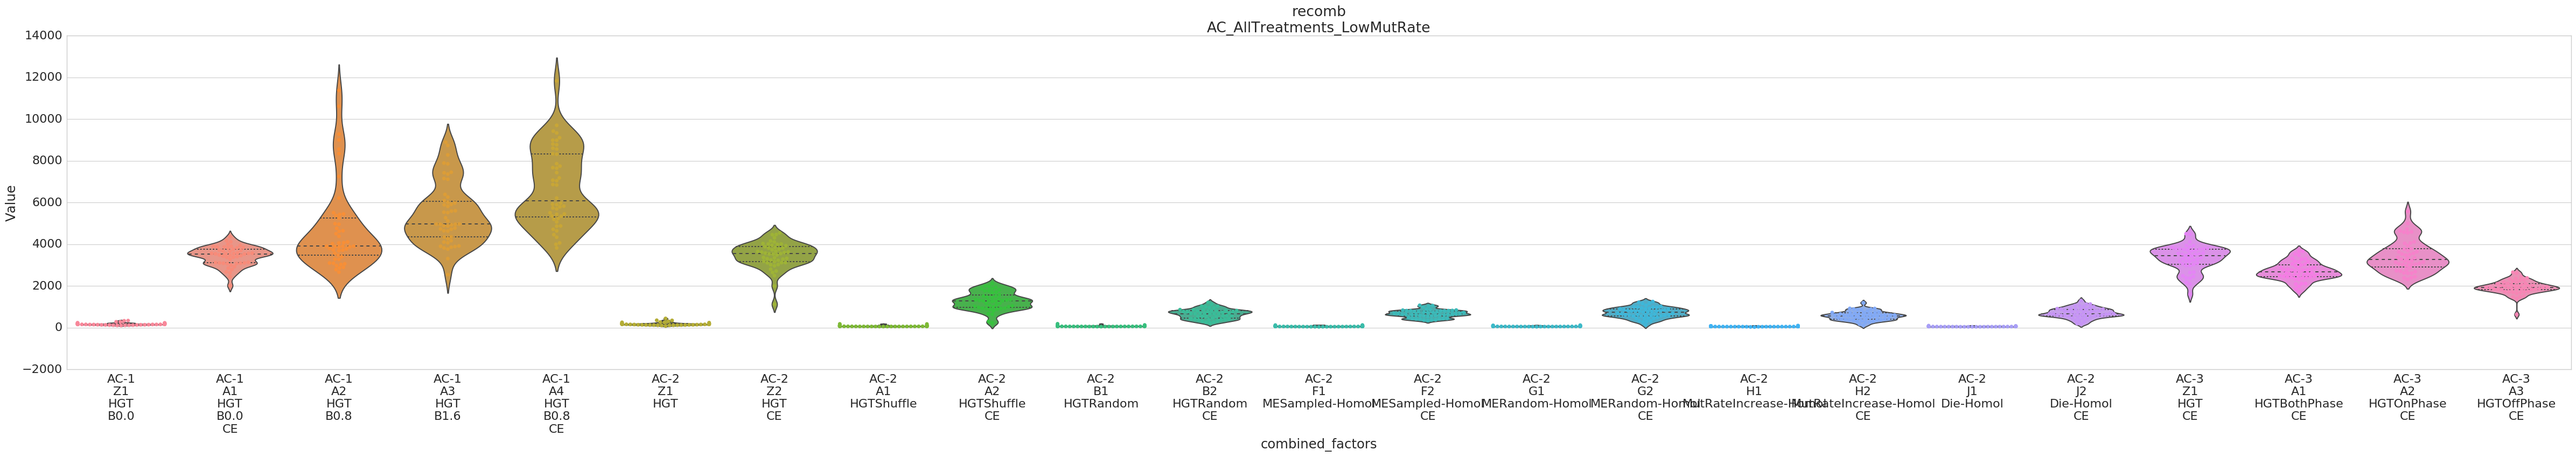

In [34]:
extract_stats(treatments, "hgt.dat.gz", "recomb", 8, verbose=False, dont_overwrite=True)
basic_violin(treatments, "recomb", width=60) 

## Fragment Effects

In [ ]:
phase_treatments = [treatments[t] for t in treatments if "AC-3" in t]
print phase_treatments
for phase_treatment in phase_treatments:
    df_t1 = read_fragment_effects(phase_treatment['dir'], 'A_cycle_hgt_fitnessdist-199001.dat') 
    print df_t1.describe()
    df_t1 = df_t1.sample(100)
    print df_t1.describe()
    plot_flamegraph(df_t1, maxy=200, update_binsize=5, title=phase_treatment['longlabel']+" ")
    plt.show()


In [126]:
plot_fragment_effects(grab_set(series="AC-3", ts=treatments), title="AC-3") 

TypeError: plot_fragment_effects() takes at least 2 arguments (2 given)

## Other Stuff

In [ ]:
extract_stats(treatments, "average.dat.gz", "execlength", 8, verbose=False)
basic_violin(treatments, "execlength", width=50)

In [ ]:
extract_stats(treatments, "average.dat.gz", "length", 7, verbose=False)
basic_violin(treatments, "length", width=50)

# Back-End

## Init

### Imports

In [198]:
import glob
import csv
import math
import collections
import os.path
from sets import Set
import sys


import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=2)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import scipy  
import scikits.bootstrap as bootstrap
#from scipy import stats
import scipy.stats as ss
import matplotlib.gridspec as gridspec
#from IPython.display import Image

from PIL import Image
from IPython.display import Image as ipyImage

import prettyplotlib as ppl
from matplotlib.colors import LogNorm
from prettyplotlib import brewer2mpl


#%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)
%rehashx

#import mpld3
#mpld3.enable_notebook()

pd.__version__

u'0.20.3'

### Dataset Management Functions

In [199]:
data_path = ""
scripts_path = ""
analysis_directory = ""
data_name = ""

In [238]:
def add_treatment(dic, series, name, seed, longname=None, shortid=None, 
                  factors={}, skip_seeds=None,
                  location=None, filename=None):
    shortlabel = name
    if series:
        shortlabel = series + "_" + name
        
    if not longname:
        longname = "\n".join( name.split("_") )
                        
    if not location:        
        location = series + "_" + name + "_" + seed
    
    if skip_seeds == None:
        skip_seeds = []
    
    dic[shortlabel] = {'longlabel': longname, 'shortlabel': shortlabel, 'series': series, 'id': shortid,
                  'dir': location, 'filename': filename, 'factors': factors, 'skip': skip_seeds} 

## Data Setup - EDIT ME

In [239]:
data_name = "CA_GrazingHypothesis_LongTermEvolution"
data_number = "CA-1"

treatments = collections.OrderedDict()
add_treatment(treatments, series="CA-1", seed="104", name="Z1_HGT_B0.0", shortid="Z1",
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="Z2_noHGT_B0.0",  shortid="Z2",
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z3_noHGT_B0.0_CE", shortid="Z3", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z4_noHGT_B0.0_CEq", shortid="Z4", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False", 'Exp': 'B'})

add_treatment(treatments, series="CA-1", seed="104", name="Z5_noHGT_B0.0_CE_benign", shortid="Z5", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z6_noHGT_B0.0_CEq_benign", shortid="Z6", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False"})

add_treatment(treatments, series="CA-1", seed="104", name="Z7_HGT_B0.0_nologic77", shortid="Z7", 
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z8_noHGT_B0.0_nologic77", shortid="Z8", 
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'B'})



add_treatment(treatments, series="CA-1", seed="104", name="A1_HGT_B0.0_CE", shortid="A1", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="A5_HGT_B0.0_CEq", shortid="A5", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})

add_treatment(treatments, series="CA-1", seed="104", name="A2_HGT_B0.8", shortid="A2", 
              factors={'Bonus':"B0.8", 'Env':"Static", 'Quiesce': "True", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="A3_HGT_B1.6", shortid="A3", 
              factors={'Bonus':"B1.6", 'Env':"Static", 'Quiesce': "True", 'Exp': 'A'})

add_treatment(treatments, series="CA-1", seed="104", name="A4_HGT_B0.8_CE", shortid="A4", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "False", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="A6_HGT_B0.8_CEq", shortid="A6", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})


add_treatment(treatments, series="CA-1", seed="104", name="B1_HGT_B0.0_CE_benign", shortid="B1", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="B5_HGT_B0.0_CEq_benign", shortid="B5", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})

add_treatment(treatments, series="CA-1", seed="104", name="B4_HGT_B0.8_CE_benign", shortid="B4", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "False", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="B6_HGT_B0.8_CEq_benign", shortid="B6", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})


print treatments

OrderedDict([('CA-1_Z1_HGT_B0.0', {'shortlabel': 'CA-1_Z1_HGT_B0.0', 'skip': [], 'longlabel': 'Z1\nHGT\nB0.0', 'factors': {'Bonus': 'B0.0', 'Quiesce': 'True', 'Exp': 'A', 'Env': 'Static'}, 'series': 'CA-1', 'id': 'Z1', 'dir': 'CA-1_Z1_HGT_B0.0_104', 'filename': None}), ('CA-1_Z2_noHGT_B0.0', {'shortlabel': 'CA-1_Z2_noHGT_B0.0', 'skip': [], 'longlabel': 'Z2\nnoHGT\nB0.0', 'factors': {'Bonus': 'B0.0', 'Quiesce': 'True', 'Exp': 'B', 'Env': 'Static'}, 'series': 'CA-1', 'id': 'Z2', 'dir': 'CA-1_Z2_noHGT_B0.0_104', 'filename': None}), ('CA-1_Z3_noHGT_B0.0_CE', {'shortlabel': 'CA-1_Z3_noHGT_B0.0_CE', 'skip': [], 'longlabel': 'Z3\nnoHGT\nB0.0\nCE', 'factors': {'Bonus': 'B0.0', 'Quiesce': 'True', 'Exp': 'B', 'Env': 'CE'}, 'series': 'CA-1', 'id': 'Z3', 'dir': 'CA-1_Z3_noHGT_B0.0_CE_104', 'filename': None}), ('CA-1_Z4_noHGT_B0.0_CEq', {'shortlabel': 'CA-1_Z4_noHGT_B0.0_CEq', 'skip': [], 'longlabel': 'Z4\nnoHGT\nB0.0\nCEq', 'factors': {'Bonus': 'B0.0', 'Quiesce': 'False', 'Exp': 'B', 'Env': 'CE'},

In [202]:

def setup_analysis_path(treatments, base_path="/Core/home/rosiec/__research/HGT/raw_data/", 
                        scripts="~/Dropbox/School_Docs/Research/research_scripts/", verbose=False):
    ## basic config
    #base_path = "/Core/home/rosiec/__research/HGT/raw_data/FinalData/"
    #base_path = "/run/media/rosiec/Morlock/research/HGT/raw_data/FinalData/"

    global analysis_directory
    analysis_directory = "analysis"
    
    ## generated
    data_directory = "_".join(data_name.split(" "))
    global data_path
    data_path = base_path + data_directory
    analysis_path = data_path + "/" + analysis_directory
    global scripts_path
    scripts_path = scripts
    
#    global scripts_path
#    scripts_path = scripts_path

    if verbose:
        print "base_path:", base_path
        print "scripts_path:", scripts_path
        print "data_path:",data_path
        print "analysis_path", analysis_path
        print
        print "Treatments:"
        print treatments.keys()
        print
        print "Values:"
        for val in treatments.values():
            print val

In [203]:
def prepare_analysis_directories(treatments, skipchecks=False, cleanup=True, verbose=False, length=200000):

    if verbose:
        print data_path
    %cd {data_path}
    !mkdir incomplete
    #if verbose:
    #    !pwd
    #    %pwd
    #%mkdir incomplete
    if verbose:
        !pwd
    #!ls
    
    if not skipchecks:
        bleh = []
        for t in treatments:
            print treatments[t]['dir']
            datafiles = glob.glob(data_path+'/'+treatments[t]['dir']+'*')
            for item in datafiles:

                filepath = item +"/data/count.dat"
                if os.path.isfile(filepath):
                    line = !tail -n 1 $filepath
                elif os.path.isfile(filepath+".gz"):
                    filepath = filepath+".gz"
                    line = !zcat $filepath | tail -n 1
                else:
                    if verbose:
                        print "count.dat[.gz] not found."
                    line = ""

                filepath = item +"/data/average.dat"
                if not os.path.isfile(filepath) and not os.path.isfile(filepath+".gz"):
                    if verbose:
                        print "average.dat[.gz] not found."
                    line = ""



                #print filepath
                #bleh = line
                #print line
                #line = line.split(' ')[0]
                #print line
                if len(line) == 0 or line[0].split(' ')[0] != str(length):
                    if verbose:
                        print "Incomplete", item, line
                    if cleanup:
                        !mv $item incomplete/

    %mkdir {analysis_directory}
    %cd {analysis_directory}
    if verbose:
        %pwd

    for t in treatments:
        print
        print t, ": " , len(glob.glob(data_path+'/'+treatments[t]['dir']+'*'))
        for v in treatments[t]:
            print "  ",v,": ", treatments[t][v]
            


In [204]:
pwd

u'/Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution/analysis'

In [205]:
## Call the init methods 
setup_analysis_path(treatments, base_path="/Core/home/rosiec/__research/HGT/raw_data/FinalData/", verbose=True)
prepare_analysis_directories(treatments, skipchecks=False, cleanup=True, verbose=True, length=400000)

base_path: /Core/home/rosiec/__research/HGT/raw_data/FinalData/
scripts_path: ~/Dropbox/School_Docs/Research/research_scripts/
data_path: /Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution
analysis_path /Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution/analysis

Treatments:
['CA-1_Z1_HGT_B0.0', 'CA-1_Z2_noHGT_B0.0', 'CA-1_Z3_noHGT_B0.0_CE', 'CA-1_Z4_noHGT_B0.0_CEq', 'CA-1_Z5_noHGT_B0.0_CE_benign', 'CA-1_Z6_noHGT_B0.0_CEq_benign', 'CA-1_Z7_HGT_B0.0_nologic77', 'CA-1_Z8_noHGT_B0.0_nologic77', 'CA-1_A1_HGT_B0.0_CE', 'CA-1_A5_HGT_B0.0_CEq', 'CA-1_A2_HGT_B0.8', 'CA-1_A3_HGT_B1.6', 'CA-1_A4_HGT_B0.8_CE', 'CA-1_A6_HGT_B0.8_CEq', 'CA-1_B1_HGT_B0.0_CE_benign', 'CA-1_B5_HGT_B0.0_CEq_benign', 'CA-1_B4_HGT_B0.8_CE_benign', 'CA-1_B6_HGT_B0.8_CEq_benign']

Values:
{'factors': {'Bonus': 'B0.0', 'Quiesce': 'True', 'Exp': 'A', 'Env': 'Static'}, 'series': 'CA-1', 'filename': None, 'shortlabel': 'CA-1_Z1_HGT_B0.0', 'longlabe

   longlabel :  A4
HGT
B0.8
CE
   skip :  []
   dir :  CA-1_A4_HGT_B0.8_CE_104

CA-1_A6_HGT_B0.8_CEq :  42
   factors :  {'Bonus': 'B0.8', 'Quiesce': 'True', 'Exp': 'B', 'Env': 'CE'}
   series :  CA-1
   filename :  None
   shortlabel :  CA-1_A6_HGT_B0.8_CEq
   longlabel :  A6
HGT
B0.8
CEq
   skip :  []
   dir :  CA-1_A6_HGT_B0.8_CEq_104

CA-1_B1_HGT_B0.0_CE_benign :  46
   factors :  {'Bonus': 'B0.0', 'Quiesce': 'False', 'Exp': 'B', 'Env': 'CE'}
   series :  CA-1
   filename :  None
   shortlabel :  CA-1_B1_HGT_B0.0_CE_benign
   longlabel :  B1
HGT
B0.0
CE
benign
   skip :  []
   dir :  CA-1_B1_HGT_B0.0_CE_benign_104

CA-1_B5_HGT_B0.0_CEq_benign :  50
   factors :  {'Bonus': 'B0.0', 'Quiesce': 'True', 'Exp': 'B', 'Env': 'CE'}
   series :  CA-1
   filename :  None
   shortlabel :  CA-1_B5_HGT_B0.0_CEq_benign
   longlabel :  B5
HGT
B0.0
CEq
benign
   skip :  []
   dir :  CA-1_B5_HGT_B0.0_CEq_benign_104

CA-1_B4_HGT_B0.8_CE_benign :  35
   factors :  {'Bonus': 'B0.8', 'Quiesce': 'False',

# Init Complete Check

In [206]:
print "INIT COMPLETE"

INIT COMPLETE


In [207]:
def test_data_accessibility(treatments):
    !pwd
    direct = treatments[treatments.keys()[0]]['dir']
    print "regular cat"
    %cat ../{direct}001/data/log_average.dat | head -n 20
    print
    print "zcat"
    %zcat ../{direct}001/data/log_average.dat* | head -n 20
    
test_data_accessibility(treatments)

/Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution/analysis
regular cat
cat: ../CA-1_Z1_HGT_B0.0_104001/data/log_average.dat: No such file or directory

zcat
# Avida Fitness Data
# Sun Sep 17 15:03:39 2017
#  1: Update
#  2: Fitness
#  3: Fitness STE
#  4: Fitness Variance
#  5: Log Fitness
#  6: Log Fitness STE
#  7: Log Fitness Variance

0 0 0 0 -inf -nan -nan 
100 0.24822 0.000144608 7.52814e-05 -1.39423 0.000710771 0.0018187 
200 0.248201 0.000137715 6.8276e-05 -1.3942 0.000650761 0.00152456 
300 0.247937 0.000177811 0.000113821 -1.39596 0.000984501 0.00348927 
400 0.248043 0.000152227 8.34235e-05 -1.39501 0.000732263 0.00193035 
500 0.24777 0.000173827 0.000108777 -1.39639 0.000849232 0.0025963 
600 0.247465 0.000188502 0.000127883 -1.39784 0.000928183 0.00310063 
700 0.247889 0.000170936 0.000105131 -1.39586 0.000827008 0.00246082 
800 0.24805 0.000162786 9.53972e-05 -1.39512 0.000799292 0.00229993 
900 0.248163 0.000175814 0.000111278 -1.3

In [208]:
def test_scripts_accessibilty(treatments):
    import sys
    sys.path.append({scripts_path})
    %run {scripts_path}/quickplot.py --help
    
test_scripts_accessibilty(treatments)

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

## Plotting Functions

### Helper Functions

#### Dataset Manipulation (Grab/Thin)

In [209]:
def grab_set(ts, factor=None, series=None):
    if not factor and not series:
        return ts
    if series and factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               (factor in ts[t]['factors'].values() and 
               ts[t]['series'] == series)]
        
        #print "HI", series, factor
        #print thing
        
    elif factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               factor in ts[t]['factors'].values()]
    elif series:
        thing = [ts[t]['shortlabel'] for t in ts if 
               ts[t]['series'] == series]
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_grab_set(treatments):

    print "Subsetting"
    print treatments.keys()
    print
    print "Subset, selecting on series AC-1"
    print grab_set(series="AC-1", ts=treatments).keys()

In [210]:
## THIN SETS
def thin_set(ts, factor=None, series=None):

    thing = ts.keys()
    
    if factor:
        for t in ts.keys():
            if factor in ts[t]['factors'].values():
                thing.remove(t)
                
    if series:
        for t in ts.keys():
            if series == ts[t]['series']:
                thing.remove(t)
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_thin_set(treatments):
    print
    print "Thinning Set"
    print treatments.keys()
    thingy = grab_set(series="AC-2", factor="Homol", ts=treatments)
    print
    print "Subset selecting by HOMOL factor"
    print thingy.keys()
    print
    print "Thinned by removing MRI factor"
    print thin_set(factor="MRI", ts=thingy).keys()

In [211]:
def factorset(treatments):
    factorset = None
    for t in ac2_set:
        if not factorset:
            factorset = set(treatments[t]['factors'].keys())
        factorset &= set(treatments[t]['factors'].keys())
    return list(factorset)

In [212]:
def matchingcolumns(dataset1, dataset2):
    return list( set(dataset1.columns) & set(dataset2.columns) )
    

#### Data Extraction

##### Extract Stats - With Python Script and dump into summary csv file. (relatively slow)

In [213]:
## generate sums datafiles

def extract_stats(treatments, datafile, fieldname, field_num, verbose=True, calc="mean", dont_overwrite=False):
    ## calc can be "calculate_stats", "mean", "median", "ste", "std", "var", "sum"   

    outfiles = ""
    print "Extract Stats:", datafile, "field:", fieldname, "(", field_num, ") - ", calc
    sys.stdout.write("Extracting: ")
    for t in treatments:
        datafiles = ""
        outfile = treatments[t]['shortlabel'] + "_" + fieldname + ".csv"

        dfiles = glob.glob(data_path+'/'+treatments[t]['dir']+'*')
        for item in dfiles:
            filepath = item +"/data/"+datafile
            datafiles += filepath + " "

        script  = scripts_path + 'common/extract_single_column_to_csv.py --'+calc+' -s " " ' + str(field_num) + ' '
        script += datafiles
        script += ' >> ' + outfile

        if verbose:
            print script
            print
        
        existed = False
        if os.path.isfile(outfile): # there's a file            
            if not dont_overwrite: # we can overwrite it.            
                !rm $outfile
                !python2 $script
            existed = True
        else: ## no file, always write it
            !python2 $script            
            
        
        
        if (existed):
            if dont_overwrite:
                sys.stdout.write(',')
            else:
                sys.stdout.write('o')
        else:
            sys.stdout.write('+')
            
        sys.stdout.flush()


        if verbose:
            print outfile
        outfiles += outfile + " "        
        
        
        
        
    print " Done"

In [214]:
def test_extract_stats(treatments):

    #incoming_postfix = '_active_site_count.csv'
    fieldname = "fitness"
    extract_stats(treatments, "average.dat.gz", fieldname, "4", verbose=False, dont_overwrite=True)  
    %ls *_fitness.csv
    fn = treatments[treatments.keys()[0]]['shortlabel'] + "_" + fieldname + ".csv"
    %head {fn}
test_extract_stats(treatments)

Extract Stats: average.dat.gz field: fitness ( 4 ) -  mean
Extracting: ,+++++++,,,,,,++++ Done
CA-1_A1_HGT_B0.0_CE_fitness.csv
CA-1_A2_HGT_B0.8_fitness.csv
CA-1_A3_HGT_B1.6_fitness.csv
CA-1_A4_HGT_B0.8_CE_fitness.csv
CA-1_A5_HGT_B0.0_CEq_fitness.csv
CA-1_A6_HGT_B0.8_CEq_fitness.csv
CA-1_B1_HGT_B0.0_CE_benign_fitness.csv
CA-1_B4_HGT_B0.8_CE_benign_fitness.csv
CA-1_B5_HGT_B0.0_CEq_benign_fitness.csv
CA-1_B6_HGT_B0.8_CEq_benign_fitness.csv
CA-1_Z1_HGT_B0.0_fitness.csv
CA-1_Z2_noHGT_B0.0_fitness.csv
CA-1_Z3_noHGT_B0.0_CE_fitness.csv
CA-1_Z4_noHGT_B0.0_CEq_fitness.csv
CA-1_Z5_noHGT_B0.0_CE_benign_fitness.csv
CA-1_Z6_noHGT_B0.0_CEq_benign_fitness.csv
CA-1_Z7_HGT_B0.0_nologic77_fitness.csv
CA-1_Z8_noHGT_B0.0_nologic77_fitness.csv
24813.5454246
623595.008163
1165265.59865
32933.6161722
2201218.33193
20212654.5977
32241.7616968
7000.73065662
22846.7085493
17673366.1021


##### Import Data summary files into a dataframe

In [215]:
def import_data(treatments, fieldnames, location="", subset=[]):    

    if not isinstance(fieldnames, list):
        fieldnames = [fieldnames]
    
    if location:
        for t in treatments:
            f = treatments[t]['shortlabel'] + "_" + fieldname + ".csv"
            df = location + f ## if they're somewhere else, for whatever reason
            print "moving from", df, "to", f
            !cp $df ./$f

    dfs = []
    for t in treatments:      
        ## pull in the data    
        
        if len(subset) > 0:
            if not treatments[t]['shortlabel'] in subset:
                continue
                
        for fieldname in fieldnames:                
            f = treatments[t]['shortlabel'] + "_" + fieldname + ".csv"
            dta = pd.read_csv(f, header=None, skipinitialspace=True, names=["Value"])

            #print dta.dropna().head()
            dta = dta.dropna()

            dta['Label'] = [treatments[t]['shortlabel']] * len(dta)
            
            for f in treatments[t]['factors'].keys():
                dta[f] = [treatments[t]['factors'][f]] * len(dta)
                
            #dta['Experiment'] = [treatments[t]['exp']] * len(dta)
            #dta['SubExp'] = [treatments[t]['subex']] * len(dta)
            #dta['Treatment'] = [treatments[t]['treatment']] * len(dta)
            dta['Fieldname'] = [fieldname] * len(dta)

    #         wholex = treatments[t]['exp']
    #         if treatments[t]['subex']:
    #             wholex += "\n" + treatments[t]['subex']
    #         dta['Whole_Experiment'] = [wholex] * len(dta)
            dfs.append(dta)

    bigframe = pd.concat(dfs, axis=0)
    bigframe.head()
    return bigframe #.dropna()

In [216]:
def test_import_data(treatments):

    df = import_data(treatments, "fitness")
    print df.describe()
    #print df.columns
    print df.head()
    #print df.tail()
test_import_data(treatments)

              Value
count  7.130000e+02
mean   6.989231e+08
std    1.261754e+10
min    1.359839e+00
25%    3.381972e+02
50%    2.382660e+04
75%    1.165266e+06
max    2.383973e+11
  Bonus     Env Exp Fieldname             Label Quiesce         Value
0  B0.0  Static   A   fitness  CA-1_Z1_HGT_B0.0    True  2.481355e+04
1  B0.0  Static   A   fitness  CA-1_Z1_HGT_B0.0    True  6.235950e+05
2  B0.0  Static   A   fitness  CA-1_Z1_HGT_B0.0    True  1.165266e+06
3  B0.0  Static   A   fitness  CA-1_Z1_HGT_B0.0    True  3.293362e+04
4  B0.0  Static   A   fitness  CA-1_Z1_HGT_B0.0    True  2.201218e+06


##### Read raw files, and import directly to dataframe

In [217]:
#print treatments.keys()
def read_data(dirname, filename, fieldname, col):
    
    dfs = []
    
    dfiles = glob.glob(data_path+'/'+dirname+'*')
    print "begun reading files."    
    for item in sorted(dfiles):
        filepath = item +"/data/"+filename
        if len(glob.glob(filepath+"*")) > 0:
            filepath = glob.glob(filepath+"*")[0]
        else:
            raise("File Not Found.")
        
        #print filepath

        df = pd.read_csv(filepath, sep=" ", header=None, usecols=[col],
                #index_col=1, 
                names=[fieldname],
                comment="#",
                skip_blank_lines=True,
                )  
        
        df = df.dropna()
        
        df['replicate'] = [item[-2:]] * len(df[fieldname])
                
        dfs.append(df)
        
    print "finished reading files."    
    bigframe = pd.concat(dfs, axis=0)
    
    bigframe = bigframe.sort_index()
    return bigframe #.dropna() 

In [218]:
def collect_data(ts,filename, fieldname, col):
    
    dfs = []
    for t in ts:
        try:
            print t

            dta = read_data(ts[t]['dir'], filename, fieldname, col)  

            dta = dta.replace([np.inf, -np.inf], np.nan)
            dta = dta.dropna()

            #dta['source'] = [t] * len(dta['effect'])
            
            dta['Label'] = [ts[t]['shortlabel']] * len(dta)
            #dta['DisplayLabel'] = ["\n".join(ts[t]['shortlabel'].split("_"))] * len(dta)
            #dta['Fieldname'] = [fieldname] * len(dta)
            
            for f in ts[t]['factors'].keys():
                dta[f] = [ts[t]['factors'][f]] * len(dta)

            dfs.append(dta)
        except:
            continue
            
    bigframe = pd.concat(dfs, axis=0)
    return bigframe

In [219]:
def aggregate_data(ts, dataframe, fieldname="Value", aggregation="mean"):
    factorset = None
    for t in ts:
        if not factorset:
            factorset = set(ts[t]['factors'].keys())
        factorset &= set(ts[t]['factors'].keys())
    #print factorset
    
    #othercols = list(set(dataframe.columns) - set([fieldname]))
    
    grouped = dataframe.groupby((['Label', 'replicate'] + list(factorset)))
    if aggregation == "mean":
        dataframe_aggregated = grouped[fieldname].mean().reset_index()
    elif aggregation == "sum":
        dataframe_aggregated = grouped[fieldname].sum().reset_index()   
        
    return dataframe_aggregated
    
    
    

In [220]:
def generate_display_label(dataframe, labelfield="Label"):
        #df = pd.DataFrame(dataframe)
        return dataframe.apply(lambda row: "\n".join(row[labelfield].split("_")), axis=1)
        #return df

begun reading files.
finished reading files.
   uptake replicate
0       0        01
0       0        20
0       0        32
0       0        03
0       0        49
              uptake
count  196049.000000
mean    99442.536544
std     51255.835906
min         0.000000
25%     60735.000000
50%     99174.000000
75%    137827.000000
max    317196.000000
   uptake replicate
0       0        01
0       0        20
0       0        32
0       0        03
0       0        49
      uptake replicate
4000  123430        19
4000   81512        08
4000   49841        42
4000   37388        14
4000   66281        50
              uptake
count  196049.000000
mean    99442.536544
std     51255.835906
min         0.000000
25%     60735.000000
50%     99174.000000
75%    137827.000000
max    317196.000000


CA-1_Z1_HGT_B0.0
begun reading files.
finished reading files.
CA-1_Z2_noHGT_B0.0
begun reading files.
finished reading files.
CA-1_Z3_noHGT_B0.0_CE
begun reading files.
finished reading files.
CA-1

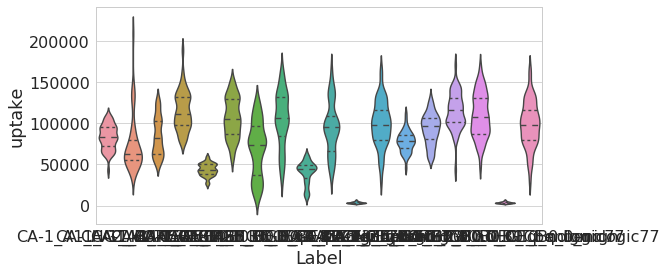

In [221]:
def test_read_data(treatments):
    #sorted_bdf = bdf.sort_index()

    bdf = read_data(treatments[treatments.keys()[1]]['dir'], 'hgt.dat.gz','uptake', 6)    
    print bdf.head()
    print bdf.describe()
    bdf = bdf.replace([np.inf, -np.inf], np.nan)
    bdf = bdf.dropna()
    print bdf.head()
    print bdf.tail()
    print bdf.describe()

def test_collect_data(treatments):
    bigframe = collect_data(grab_set(series="CA-1", ts=treatments), 'hgt.dat.gz','uptake', 6) 
    print bigframe.head()
    print bigframe.describe()
    print
    
    print "HELLO"
    
    grouped = bigframe.groupby(['Label','replicate','Bonus','Env'])
    print grouped.head()
    effect_means = grouped['uptake'].mean().reset_index()
    print effect_means.head()
    
    #effect_means.bar(x="uptake")
    sns.violinplot(x="Label", y="uptake", #hue="Env", 
                   data=effect_means, 
#                       split=True, 
                       scale="count", scale_hue=False, bw=.3, inner="quart", 
#                       palette=pal_v
                  )
test_read_data(treatments) 
print
print
test_collect_data(treatments)



##### Read Fragment Effects

In [222]:
#print treatments.keys()
def read_fragment_effects(dirname, filename):
    
    dfs = []
    
    dfiles = glob.glob(data_path+'/'+dirname+'*')
    print "begun reading files."    
    for item in sorted(dfiles):
        filepath = item +"/data/"+filename
        if len(glob.glob(filepath+"*")) > 0:
            filepath = glob.glob(filepath+"*")[0]
        else:
            raise("File Not Found.")
        
        
        
        
        #print filepath

        df = pd.read_csv(filepath, sep=" ", header=None, usecols=[0,1,2,5,6],
                index_col=1, 
                names=["cell", "donor_update","effect", "hamming_dist", "fraction"],
                comment="#",
                skip_blank_lines=True,
                )  
        
        df = df.dropna()
        
        df['replicate'] = [item[-2:]] * len(df['cell'])
                
        dfs.append(df)
        
    print "finished reading files."    
    bigframe = pd.concat(dfs, axis=0)
    
    bigframe = bigframe.sort_index()
    return bigframe #.dropna() 

In [223]:
def collect_fragment_effects_data(ts,filename='A_cycle_hgt_fitnessdist-199001.dat',):
    
    dfs = []
    for t in ts:
        try:
            print t

            dta = read_fragment_effects(ts[t]['dir'], filename)  

            dta = dta.replace([np.inf, -np.inf], np.nan)
            dta = dta.dropna()

            #dta['source'] = [t] * len(dta['effect'])
            
            dta['Label'] = [ts[t]['shortlabel']] * len(dta)
            #dta['DisplayLabel'] = ["\n".join(ts[t]['shortlabel'].split("_"))] * len(dta)
            
            for f in ts[t]['factors'].keys():
                dta[f] = [ts[t]['factors'][f]] * len(dta)

            dfs.append(dta)
        except:
            continue
            
    bigframe = pd.concat(dfs, axis=0)
    return bigframe

In [224]:
def test_read_fragment_effects(treatments):
    #sorted_bdf = bdf.sort_index()

    bdf = read_fragment_effects(treatments[treatments.keys()[1]]['dir'], 'A_cycle_hgt_fitnessdist-199001.dat')    
    print bdf.head()
    print bdf.describe()
    bdf = bdf.replace([np.inf, -np.inf], np.nan)
    bdf = bdf.dropna()
    print bdf.head()
    print bdf.tail()
    print bdf.describe()
    
test_read_fragment_effects(treatments)    

begun reading files.


TypeError: exceptions must be old-style classes or derived from BaseException, not str

In [ ]:
def test_collect_fragment_effects(treatments):
     #ac2_df = collect_fragment_effects_data(grab_set(series="AC-2", ts=treatments))
    bdf = collect_fragment_effects_data(grab_set(series="AC-3", ts=treatments))
    print bdf.head()
    print bdf.describe()
test_collect_fragment_effects(treatments)

##### Read Fragment Phenotype Change

In [ ]:
def read_fragment_phenotype_change(dirname, filename, incl_neutral=False, negative=False):
    
    dfiles = glob.glob(data_path+'/'+dirname+'*')
    print "begun reading files."

    totals = []
    bens = []
    fracs = []
    repl = []

    for item in sorted(dfiles):
        filepath = item +"/data/"+filename
        if len(glob.glob(filepath+"*")) > 0:
            filepath = glob.glob(filepath+"*")[0]
        else:
            raise("File Not Found.")
          
        df = pd.read_csv(filepath, sep=" ", header=None, usecols=[1,2,3,4,6],
                        index_col=0, 
                        names=["donor_update","effect", "original_task", "mod_task", "fraction"],
                        comment="#",
                        skip_blank_lines=True,
                         #skiprows=8
                        converters={'original_task': lambda x: int(x,2)>>1, 'mod_task': lambda x: int(x,2)>>1})
        #print df.describe()
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.dropna()
        #print df.describe()
        
        if negative:
            if (incl_neutral):
                df_subset2 = df.loc[df['effect'] <= 0.0]
                #df_subset2 = df_subset.loc[df_subset['original_task'] != df_subset['mod_task']]
            else:
                df_subset = df.loc[df['effect'] < 0.0]
                df_subset2 = df_subset.loc[df_subset['original_task'] != df_subset['mod_task']]           
        else:
            if (incl_neutral):
                df_subset2 = df.loc[df['effect'] >= 0.0]
                #df_subset2 = df_subset.loc[df_subset['original_task'] != df_subset['mod_task']]
            else:
                df_subset = df.loc[df['effect'] > 0.0]
                df_subset2 = df_subset.loc[df_subset['original_task'] != df_subset['mod_task']]
             
        repl.append(item[-2:])    
        totals.append(df['effect'].count())
        bens.append(df_subset2['effect'].count())
        fracs.append(bens[-1]/float(totals[-1]))
        
    print "finished reading files."    
 
    newdf = pd.DataFrame()
    newdf['total_frags'] = totals
    newdf['ben_frags'] = bens
    newdf['frac_ben'] = fracs
    newdf['replicate'] = repl

    return newdf

In [ ]:
def test_read_fragment_phenotype_change(treatments):
    #sorted_bdf = bdf.sort_index()

    bdf = read_fragment_phenotype_change(treatments[treatments.keys()[1]]['dir'], 'A_cycle_hgt_fitnessdist-100001.dat')    
    print bdf.head()
    print bdf.describe()
test_read_fragment_phenotype_change(treatments)

In [ ]:
def collect_fragment_phenotype_change(ts, filename='A_cycle_hgt_fitnessdist-199001.dat', 
                                   incl_neutral=False, negative=False):
    dfs = []
    for t in ts:
        print t
        try:
            dta = read_fragment_phenotype_change(ts[t]['dir'], filename, 
                                                 incl_neutral=incl_neutral, negative=negative)  
            
            #dfa['source'] = [t] * len(dta['total_frags'])
            
            dta = dta.replace([np.inf, -np.inf], np.nan)
            dta = dta.dropna()

            #dta['source'] = [t] * len(dta['effect'])
            
            dta['Label'] = [ts[t]['shortlabel']] * len(dta)
            #dta['DisplayLabel'] = ["\n".join(ts[t]['shortlabel'].split("_"))] * len(dta)
            
            for f in ts[t]['factors'].keys():
                dta[f] = [ts[t]['factors'][f]] * len(dta)
            
            dfs.append(dta)
        except:
            continue
            
        

    bigframe = pd.concat(dfs, axis=0)   
    
    #bigframe['treatment'] = bigframe['source'].apply(lambda row: "\n".join(row.split("_")))
    return bigframe

In [ ]:
def test_collect_fragment_phenotype_change(treatments):
    #sorted_bdf = bdf.sort_index()

    bdf = collect_fragment_phenotype_change(grab_set(series="AC-3", ts=treatments), 'A_cycle_hgt_fitnessdist-100001.dat')    
    print bdf.head()
    print bdf.describe()
test_collect_fragment_phenotype_change(treatments)

### Plotting

#### Plot Violin

In [ ]:
def basic_violin(ts, fieldnames, subset=[], hue=None, title="", width=16, height=8, debug=False, font_scale=2):
    
    if not isinstance(fieldnames, list):
        fieldnames = [fieldnames]
        
    fieldname = " ".join(fieldnames)    
        
    df = import_data(ts, fieldnames, subset=subset)
    
    if debug:
        print df.head()
    
#    print "HIHI"
    df['combined_factors'] = [''] * len(df)
    huebit = []
    if hue:
        factors = Set([])
        for t in ts:
            factors = factors | Set(ts[t]['factors'])
#        factors = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4']

        for f in [f for f in factors if f not in hue]: 
            if f in df.columns:
                df['combined_factors'] = df['combined_factors'] + "\n" + df[f]
                
        huebit = df[hue].dropna().unique().tolist()  
#        if huebit[0] == 'nan':
#            huebit = huebit[1:]
    elif len(fieldnames) > 1:
        huebit = df['Fieldname'].dropna().unique().tolist()
        df['combined_factors'] = df['Label'].apply(lambda row: "\n".join(row.split("_")))
    else:
        df['combined_factors'] = df['Label'].apply(lambda row: "\n".join(row.split("_")))
        
    pal_v = {}
    pal_s = {}
    
#    print 
#    print "HUEs", huebit

    if len(huebit) > 0:
        v_colors = ['r','b']
        s_colors = ['y', 'g']
            
        for v, i in zip(huebit , range(len(huebit))):
            pal_v[v] = v_colors[i]
            pal_s[v] = s_colors[i]
#    print pal_v
#    print pal_s
    
#    print "ARGH"
    #print df
    
    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=font_scale)
    
    plt.rcParams['figure.figsize'] = (width, height)
    
    if title:
        sns.plt.title(fieldname +"\n"+data_name+"\n"+title)    
    else:
        sns.plt.title(fieldname +"\n"+data_name)
        
        
#    print "WHEE"
    
    if len(fieldnames) == 2:            
        sns.violinplot(x="combined_factors", y="Value", hue="Fieldname",data=df, 
                       split=True, 
                       scale="count", scale_hue=False, bw=.3, inner="quart", 
                       palette=pal_v)
        sns.swarmplot(x="combined_factors", y="Value", hue="Fieldname", data=df, 
                     split=True,
                     palette=pal_s)
    elif len(fieldnames) > 2:
        sns.violinplot(x="combined_factors", y="Value", hue="Fieldname", data=df, 
                       scale="count", scale_hue=False, bw=.3, inner="quart")
        sns.swarmplot(x="combined_factors", y="Value", hue="Fieldname", data=df, 
                     split=True)
    elif hue:
        sns.violinplot(x="combined_factors", y="Value", hue=hue, data=df, 
                       split=True, 
                       scale="count", scale_hue=False, bw=.3, inner="quart", 
                       palette=pal_v)
        sns.swarmplot(x="combined_factors", y="Value", hue=hue, data=df, 
                     split=True,
                     palette=pal_s)        
    else:
        sns.violinplot(x="combined_factors", y="Value", data=df, 
                       scale="count", scale_hue=False, bw=.3, inner="quart")
        sns.swarmplot(x="combined_factors", y="Value", data=df, 
                     split=True)        
    plt.show()
    

In [ ]:
def test_basic_violin(treatments):

    basic_violin(treatments, "fitness", width=40)
    #basic_violin(treatments, "fitness", hue='Factor 4', width=40)
    basic_violin(grab_set(series="AC-1", ts=treatments), "fitness")
    #basic_violin(grab_set(series="AC-2", ts=treatments), "fitness", hue="Factor 4", width=50)
    basic_violin(grab_set(series="AC-2", factor="Homol", ts=treatments), "fitness", width=50)
    basic_violin(grab_set(series="AC-3", ts=treatments), "fitness")

    datafile = "hgt.dat.gz"
    field = "7"
    fieldname = 'uptake'
    
    extract_stats(treatments, datafile, "uptake", 7, verbose=False)
    extract_stats(treatments, datafile, "attempts", 10, verbose=False)
    
    basic_violin(grab_set(series="AC-1", ts=treatments), ["attempts", "uptake"])
    basic_violin(grab_set(series="AC-2", factor="Homol", ts=treatments), ["attempts", "uptake"], width=50)
    basic_violin(grab_set(series="AC-3", ts=treatments), ["attempts", "uptake"])      
    
    basic_violin(treatments, fieldname, width=50, title="All")

    basic_violin(grab_set(series="AC-1", ts=treatments), fieldname, title="AC-1", hue="Env", width=10)

    basic_violin(grab_set(series="AC-2", ts=treatments), fieldname, hue="Env", width=14, title="AC-2, Hue by Env", debug=True)
    basic_violin(grab_set(series="AC-2", factor="Homol", ts=treatments), fieldname, hue="Env", 
                 width=14, title="AC-2, Homol only, Hue by Env")

    basic_violin(grab_set(series="AC-3", ts=treatments), fieldname, title="AC-3 Only")
    
test_basic_violin(treatments)

#### Plot Fragment Effects (Flamegraph and Bar Plot)

##### Plot Flamegraph-ish Effects

In [ ]:
def plot_flamegraph(dataframe, field, maxy=50, update_binsize=5, width=2, height=2, startmod=None, title=""):
    data = []

    start = dataframe.index.values.min()
    end = dataframe.index.values.max()
    
    print "start", start
    print "end", end
    
    if startmod:
        print "Limiting data to starting at:", startmod, "update"
        start = startmod

    binmax = int(dataframe.iloc[0:-1][field].max())
    binmin = int(dataframe.iloc[0:-1][field].min())
    
    print "binmax, binmin", binmax, binmin
    
    width = (binmax - binmin) / 5.0
    
    bins = np.linspace(binmin, binmax, maxy)
    #print bins
    
    #print update_binsize
    #print start,end
    
    minct = 0
    maxct = 0
    for i in range(start, end, update_binsize):
        #print "STEP", i
        arr = [0] * (len(bins)-1)
        for j in range(update_binsize):
            
            if i+j in dataframe.index:
                vals = dataframe.loc[i+j][field]
                c,d = np.histogram(vals, bins=bins)
                c = c.tolist()
                for x in range(len(bins)-1):
                    arr[x] += c[x]

        if max(arr) > maxct:
            maxct = max(arr)
        #data.append(arr)
        #data.append([math.log(x+1) for x in arr])
        data.append([x+1 for x in arr])
    fgdata = np.array(data)
    fgdata = np.transpose(fgdata)
    
    plt.rcParams['image.cmap'] = 'hot'
    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=1)
    #plt.rcParams['figure.figsize'] = (width, height)
    
    #cmapthing = brewer2mpl.get_map('afmhot', 'Sequential (2)', 9).mpl_colormap
    #fg = plt.pcolor(fgdata)
    
    #print "WHAT", minct, maxct, fgdata
    #print LogNorm(vmin=minct, vmax=maxct)
    
    ppl.pcolormesh(fgdata,
                   cmap='hot',
                   norm=LogNorm(vmin=minct, vmax=maxct)
                  )

    
    interval = update_binsize
    
    xmin, xmax = plt.xlim()
    plt.ylim(0, len(bins))
    plt.xlim(0, len(data))
    
    ## set the x-ticks
    xlocs, xlabels = plt.xticks()
    xmodlabels = []
    xmodlocs = []
    #print xlocs
    for i in range(0, len(xlocs)):
        #value = 
        xmodlabels.append( '%sk' % float('%0.3g' % (int((start) + (xlocs[i]*interval))/1000.0)) )
        xmodlocs.append( xlocs[i] )

    plt.xticks( xmodlocs, xmodlabels,rotation=90 )

    ## set the y-ticks
#    ylocs, ylabels = plt.yticks()
    ylocs = [0, maxy*.25, maxy*.5, maxy*.75, maxy]
    plt.yticks( ylocs, np.linspace(binmin, binmax, len(ylocs)) )
    plt.xlabel( "Fragment Source Organism Birth (Updates)" )
    plt.ylabel( "Fitness Effect" )
    plt.title("Abundance of HGT Reservoir Fragments\nOrdered by Source Birth Time and Fitness Effect\n"+title)
    

In [ ]:
def test_plot_flamegraph(treatments):

    phase_treatments = grab_set(series="AC-3", ts=treatments)
#    phase_treatments = [treatments[t] for t in treatments if "AC-3" in t]
#    print phase_treatments
    for t in phase_treatments:
        df_t1 = read_fragment_effects(phase_treatments[t]['dir'], 'A_cycle_hgt_fitnessdist-199001.dat') 
        #df_t1 = df_t1.sample(100000)
        df_t1 = df_t1.replace([np.inf, -np.inf], np.nan)
        df_t1 = df_t1.dropna()
        #print df_t1.describe()
        #print df_t1
        plot_flamegraph(df_t1, field="effect", maxy=200, update_binsize=5, title="Effect\n"+phase_treatments[t]['longlabel']+" ")
        plt.show()
        plot_flamegraph(df_t1, field="fraction", maxy=200, update_binsize=5, title="Fraction\n"+phase_treatments[t]['longlabel']+" ")
        plt.show()
            
test_plot_flamegraph(treatments)            

##### Plot Fragment Effects (Bar or Violin)

In [ ]:
def plot_fragment_effects(dataframe, field, title="", plot="bar"):

    bigframe = dataframe   
    
    bigframe['treatment'] = bigframe['Label'].apply(lambda row: "\n".join(row.split("_")))
    
    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=2)
    plt.rcParams['figure.figsize'] = (20, 8)
    sns.plt.title("Fragment Effects\n"+title)
    if plot=="bar":
        sns.barplot(x="treatment", y=field, 
                       data=bigframe, 
                       )
    else:
        sns.violinplot(x="treatment", y=field, 
                   data=bigframe, 
                   scale="count", scale_hue=False, bw=.3,
                   inner="quart", 
                   )

    plt.show()
    

    
    

In [ ]:
def test_plot_fragment_effects(treatments):    
    
    #ac2_df = collect_fragment_effects_data(grab_set(series="AC-2", ts=treatments))
    ac3_df = collect_fragment_effects_data(grab_set(series="AC-3", ts=treatments))
    
    
#     plot_fragment_effects(ac2_df, field="effect", title="AC-2 - Effect")
#     plot_fragment_effects(ac2_df, field="effect", plot="violin", title="AC-2 - Effect")
#     plot_fragment_effects(ac2_df, field="fraction", title="AC-2 - Fraction")
#     plot_fragment_effects(ac2_df, field="fraction", plot="violin", title="AC-2 - Fraction")
    
    plot_fragment_effects(ac3_df, field="effect", title="AC-3 - Effect")
    plot_fragment_effects(ac3_df, field="effect", plot="violin", title="AC-3 - Effect")
    plot_fragment_effects(ac3_df, field="fraction", title="AC-3 - Fraction")
    plot_fragment_effects(ac3_df, field="fraction", plot="violin", title="AC-3 - Fraction")
    
test_plot_fragment_effects(treatments)

##### Plot Beneficial Phenotype Change

In [ ]:
def plot_fragment_phenotype_change(ts, filename='A_cycle_hgt_fitnessdist-199001.dat', title="", 
                                   incl_neutral=False, negative=False):
    
    bigframe = collect_fragment_phenotype_change(ts, filename, incl_neutral, negative)
    
    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=2)
    plt.rcParams['figure.figsize'] = (20, 8)
    sns.plt.title("Proportion of Fragment Conveying Beneficial Phen Change\n"+filename+"\n"+title)
    sns.violinplot(x="treatment", y="frac_ben", 
                   data=bigframe, 
                   scale="count", scale_hue=False, bw=.3,
                   inner="quart", 
                   )
    plt.show()
    

In [ ]:
def test_plot_fragment_phenotype_change(treatments):    
    #plot_fragment_effects(grab_set(series="AC-1", ts=treatments),title="AC-1")
    #plot_fragment_effects(grab_set(series="AC-2", ts=treatments), title="AC-2")
    #plot_fragment_phenotype_change(grab_set(series="AC-2", factor="Homol", ts=treatments), title="AC-2, Homol only")
    plot_fragment_phenotype_change(grab_set(series="AC-3", ts=treatments), title="AC-3")      
    
test_plot_fragment_phenotype_change(treatments)

# Scrap Code

In [ ]:


g = sns.jointplot(x="uptake", y="effect", data=merged_upt_fef,
                kind="reg", scatter=False,
                  annot_kws=dict(stat="r"),
                xlim=(0, 130000), ylim=(-40, 20), 
              color="k", size=7)
plt.xticks(rotation=90)
#sns.lmplot(x="uptake", y="effect", hue="Label", data=merged_upt_fef, fit_reg=False)
color_names = ['blue','green','red','magenta','yellow']
labels = list(merged_fef_means['Label'].unique())
colors = {}
for l,c in zip(labels,color_names):
    colors[l] = c

#colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}

#print g.ax_joint
g.ax_joint.scatter(merged_upt_fef['uptake'], merged_upt_fef['effect'], c=merged_upt_fef['Label'].apply(lambda x: colors[x]))

# There is no labels, need to define the labels
# Create the legend patches
legend_patches = [matplotlib.patches.Patch(color=colors[k], label=k) for k in colors.keys()]
#legend_patches = [matplotlib.patches.Patch(color=C, label=L) for
#                  C, L in zip([item.get_facecolor() for item in Boxes],
#                              legend_labels)]

# Plot the legend
lg = plt.legend(handles=legend_patches, 
           bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.)
plt.show()
#plt.title(lg, "BOOP")